# SUPPLY CHAIN MANAGEMENT

## OVERVIEW

<div style="font-family: 'CustomFont'; font-size: 20px; ">
The project focuses on optimizing the supply chain for a FMCG company that recently entered the instant noodles business. The company faces a challenge of demand-supply mismatch, leading to increased inventory costs and financial losses. The objective is to build a predictive model that can determine the optimal product weight to be shipped from each warehouse in the country.

## OBJECTIVE

<div style="font-family: 'CustomFont'; font-size: 20px; ">
The objective of this project is to build a model, using historical data that will determine an optimum weight of the product to be shipped each time from the respective warehouse.

###  IMPORTING DATASETS

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
df_train = pd.read_csv('supply_train.csv')
df_train

Unnamed: 0 Ware_house_ID WH_Manager_ID Location_type WH_capacity_size  \
0               0     WH_100000     EID_50000         Urban            Small   
1               1     WH_100001     EID_50001         Rural            Large   
2               2     WH_100002     EID_50002         Rural              Mid   
3               3     WH_100003     EID_50003         Rural              Mid   
4               4     WH_100004     EID_50004         Rural            Large   
...           ...           ...           ...           ...              ...   
16615       16615     WH_116615     EID_66615         Urban            Large   
16616       16616     WH_116616     EID_66616         Urban            Large   
16617       16617     WH_116617     EID_66617         Rural            Large   
16618       16618     WH_116618     EID_66618         Rural            Small   
16619       16619     WH_116619     EID_66619         Rural            Large   

        zone WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0       West           Zone 6                   3                    1   
1      North           Zone 5                   0                    0   
2      South           Zone 2                   1                    0   
3      North           Zone 3                   7                    4   
4      North           Zone 5                   3                    1   
...      ...              ...                 ...                  ...   
16615   West           Zone 6                   3                    1   
16616  North           Zone 5                   2                    0   
16617  North           Zone 6                   5                    0   
16618   West           Zone 6                   3                    2   
16619   West           Zone 5                   4                    0   

       Competitor_in_mkt  ...  electric_supply dist_from_hub  workers_num  \
0                      2  ...                1            91         29.0   
1                      4  ...                1           210         31.0   
2                      4  ...                0           161         37.0   
3                      2  ...                0           103         21.0   
4                      2  ...                1           112         25.0   
...                  ...  ...              ...           ...          ...   
16615                  6  ...                0           240         19.0   
16616                  2  ...                1           164         30.0   
16617                  4  ...                1           211         24.0   
16618                  3  ...                1           119          NaN   
16619                  6  ...                1           261         34.0   

       wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0              NaN                          13              0   
1              NaN                           4              0   
2              NaN                          17              0   
3              NaN                          17              1   
4           2009.0                          18              0   
...            ...                         ...            ...   
16615       2009.0                          14              0   
16616          NaN                          17              0   
16617       2003.0                          24              1   
16618       2007.0                          16              0   
16619       2001.0                          32              0   

       approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                                 A                 5              15   
1                                 A                 3              17   
2                                 A                 6              22   
3                                A+                 3              27   
4                                 C                 6              24   
...          

In [189]:
df_test = pd.read_csv('supply_test.csv')
df_test

Unnamed: 0 Ware_house_ID WH_Manager_ID Location_type WH_capacity_size  \
0          16621     WH_116621     EID_66621         Rural            Large   
1          16622     WH_116622     EID_66622         Rural            Large   
2          16623     WH_116623     EID_66623         Rural            Small   
3          16624     WH_116624     EID_66624         Rural              Mid   
4          16625     WH_116625     EID_66625         Urban              Mid   
...          ...           ...           ...           ...              ...   
5524       22145     WH_122145     EID_72145         Rural            Large   
5525       22146     WH_122146     EID_72146         Rural            Small   
5526       22147     WH_122147     EID_72147         Rural            Large   
5527       22148     WH_122148     EID_72148         Rural            Large   
5528       22149     WH_122149     EID_72149         Rural              Mid   

       zone WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0     North           Zone 5                   5                    0   
1     North           Zone 5                   5                    0   
2     North           Zone 6                   3                    0   
3      West           Zone 4                   5                    2   
4     North           Zone 4                   6                    0   
...     ...              ...                 ...                  ...   
5524  North           Zone 6                   8                    1   
5525  South           Zone 6                   3                    1   
5526  North           Zone 6                   7                    2   
5527  North           Zone 6                   6                    2   
5528   East           Zone 4                   7                    2   

      Competitor_in_mkt  ...  electric_supply dist_from_hub  workers_num  \
0                     3  ...                0           156         30.0   
1                     2  ...                1            79         31.0   
2                     3  ...                1            70         41.0   
3                     2  ...                1           255         33.0   
4                     4  ...                0           205         20.0   
...                 ...  ...              ...           ...          ...   
5524                  3  ...                1           203         28.0   
5525                  3  ...                0           170          NaN   
5526                  2  ...                0            99         22.0   
5527                  4  ...                0           220         17.0   
5528                  9  ...                1           104         36.0   

      wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0          2006.0                          24              0   
1          2019.0                           5              1   
2          2008.0                          19              1   
3          2017.0                           9              1   
4          1999.0                          25              0   
...           ...                         ...            ...   
5524       2007.0                          22              1   
5525          NaN                          26              0   
5526          NaN                          20              0   
5527          NaN                          13              0   
5528          NaN                          11              0   

      approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                                A                 2               5   
1                                C                 2              24   
2                               A+                 5               9   
3                               A+                 3              11   
4                                B                 4              26   
...                            ...               ...             .

In [190]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

In [191]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    5529 non-null   int64  
 1   Ware_house_ID                 5529 non-null   object 
 2   WH_Manager_ID                 5529 non-null   object 
 3   Location_type                 5529 non-null   object 
 4   WH_capacity_size              5529 non-null   object 
 5   zone                          5529 non-null   object 
 6   WH_regional_zone              5529 non-null   object 
 7   num_refill_req_l3m            5529 non-null   int64  
 8   transport_issue_l1y           5529 non-null   int64  
 9   Competitor_in_mkt             5529 non-null   int64  
 10  retail_shop_num               5529 non-null   int64  
 11  wh_owner_type                 5529 non-null   object 
 12  distributor_num               5529 non-null   int64  
 13  flo

In [192]:
df_train.head()

Unnamed: 0 Ware_house_ID WH_Manager_ID Location_type WH_capacity_size  \
0           0     WH_100000     EID_50000         Urban            Small   
1           1     WH_100001     EID_50001         Rural            Large   
2           2     WH_100002     EID_50002         Rural              Mid   
3           3     WH_100003     EID_50003         Rural              Mid   
4           4     WH_100004     EID_50004         Rural            Large   

    zone WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0   West           Zone 6                   3                    1   
1  North           Zone 5                   0                    0   
2  South           Zone 2                   1                    0   
3  North           Zone 3                   7                    4   
4  North           Zone 5                   3                    1   

   Competitor_in_mkt  ...  electric_supply dist_from_hub  workers_num  \
0                  2  ...                1            91         29.0   
1                  4  ...                1           210         31.0   
2                  4  ...                0           161         37.0   
3                  2  ...                0           103         21.0   
4                  2  ...                1           112         25.0   

   wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0          NaN                          13              0   
1          NaN                           4              0   
2          NaN                          17              0   
3          NaN                          17              1   
4       2009.0                          18              0   

   approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                             A                 5              15   
1                             A                 3              17   
2                             A                 6              22   
3                            A+                 3              27   
4                             C                 6              24   

   product_wg_ton  
0           17115  
1            5074  
2           23137  
3           22115  
4           24071  

[5 rows x 25 columns]

In [193]:
df_test.head()

Unnamed: 0 Ware_house_ID WH_Manager_ID Location_type WH_capacity_size  \
0       16621     WH_116621     EID_66621         Rural            Large   
1       16622     WH_116622     EID_66622         Rural            Large   
2       16623     WH_116623     EID_66623         Rural            Small   
3       16624     WH_116624     EID_66624         Rural              Mid   
4       16625     WH_116625     EID_66625         Urban              Mid   

    zone WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0  North           Zone 5                   5                    0   
1  North           Zone 5                   5                    0   
2  North           Zone 6                   3                    0   
3   West           Zone 4                   5                    2   
4  North           Zone 4                   6                    0   

   Competitor_in_mkt  ...  electric_supply dist_from_hub  workers_num  \
0                  3  ...                0           156         30.0   
1                  2  ...                1            79         31.0   
2                  3  ...                1            70         41.0   
3                  2  ...                1           255         33.0   
4                  4  ...                0           205         20.0   

   wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0       2006.0                          24              0   
1       2019.0                           5              1   
2       2008.0                          19              1   
3       2017.0                           9              1   
4       1999.0                          25              0   

   approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                             A                 2               5   
1                             C                 2              24   
2                            A+                 5               9   
3                            A+                 3              11   
4                             B                 4              26   

   product_wg_ton  
0           30132  
1            6075  
2           24076  
3           13092  
4           29071  

[5 rows x 25 columns]

### DATA PREPARATION

In [194]:
# Removing unwanted column from training dataset
df_train.drop(df_train.iloc[:, 0:1], inplace=True, axis=1)
df_train

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0         WH_100000     EID_50000         Urban            Small   West   
1         WH_100001     EID_50001         Rural            Large  North   
2         WH_100002     EID_50002         Rural              Mid  South   
3         WH_100003     EID_50003         Rural              Mid  North   
4         WH_100004     EID_50004         Rural            Large  North   
...             ...           ...           ...              ...    ...   
16615     WH_116615     EID_66615         Urban            Large   West   
16616     WH_116616     EID_66616         Urban            Large  North   
16617     WH_116617     EID_66617         Rural            Large  North   
16618     WH_116618     EID_66618         Rural            Small   West   
16619     WH_116619     EID_66619         Rural            Large   West   

      WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0               Zone 6                   3                    1   
1               Zone 5                   0                    0   
2               Zone 2                   1                    0   
3               Zone 3                   7                    4   
4               Zone 5                   3                    1   
...                ...                 ...                  ...   
16615           Zone 6                   3                    1   
16616           Zone 5                   2                    0   
16617           Zone 6                   5                    0   
16618           Zone 6                   3                    2   
16619           Zone 5                   4                    0   

       Competitor_in_mkt  retail_shop_num  ... electric_supply  dist_from_hub  \
0                      2             4651  ...               1             91   
1                      4             6217  ...               1            210   
2                      4             4306  ...               0            161   
3                      2             6000  ...               0            103   
4                      2             4740  ...               1            112   
...                  ...              ...  ...             ...            ...   
16615                  6             4779  ...               0            240   
16616                  2             5718  ...               1            164   
16617                  4             4514  ...               1            211   
16618                  3             5829  ...               1            119   
16619                  6             3751  ...               1            261   

       workers_num  wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0             29.0          NaN                          13              0   
1             31.0          NaN                           4              0   
2             37.0          NaN                          17              0   
3             21.0          NaN                          17              1   
4             25.0       2009.0                          18              0   
...            ...          ...                         ...            ...   
16615         19.0       2009.0                          14              0   
16616         30.0          NaN                          17              0   
16617         24.0       2003.0                          24              1   
16618          NaN       2007.0                          16              0   
16619         34.0       2001.0                          32              0   

       approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                                 A                 5              15   
1                                 A                 3              17   
2                                 A                 6              22   
3                                A+                 3              27   
4                        

In [195]:
# Removing unwanted column from testing dataset
df_test.drop(df_test.iloc[:, 0:1], inplace=True, axis=1)
df_test

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0        WH_116621     EID_66621         Rural            Large  North   
1        WH_116622     EID_66622         Rural            Large  North   
2        WH_116623     EID_66623         Rural            Small  North   
3        WH_116624     EID_66624         Rural              Mid   West   
4        WH_116625     EID_66625         Urban              Mid  North   
...            ...           ...           ...              ...    ...   
5524     WH_122145     EID_72145         Rural            Large  North   
5525     WH_122146     EID_72146         Rural            Small  South   
5526     WH_122147     EID_72147         Rural            Large  North   
5527     WH_122148     EID_72148         Rural            Large  North   
5528     WH_122149     EID_72149         Rural              Mid   East   

     WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0              Zone 5                   5                    0   
1              Zone 5                   5                    0   
2              Zone 6                   3                    0   
3              Zone 4                   5                    2   
4              Zone 4                   6                    0   
...               ...                 ...                  ...   
5524           Zone 6                   8                    1   
5525           Zone 6                   3                    1   
5526           Zone 6                   7                    2   
5527           Zone 6                   6                    2   
5528           Zone 4                   7                    2   

      Competitor_in_mkt  retail_shop_num  ... electric_supply  dist_from_hub  \
0                     3             5590  ...               0            156   
1                     2             5856  ...               1             79   
2                     3             4803  ...               1             70   
3                     2             4784  ...               1            255   
4                     4             3699  ...               0            205   
...                 ...              ...  ...             ...            ...   
5524                  3             5030  ...               1            203   
5525                  3             4320  ...               0            170   
5526                  2             5268  ...               0             99   
5527                  4             4378  ...               0            220   
5528                  9             3626  ...               1            104   

      workers_num  wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0            30.0       2006.0                          24              0   
1            31.0       2019.0                           5              1   
2            41.0       2008.0                          19              1   
3            33.0       2017.0                           9              1   
4            20.0       1999.0                          25              0   
...           ...          ...                         ...            ...   
5524         28.0       2007.0                          22              1   
5525          NaN          NaN                          26              0   
5526         22.0          NaN                          20              0   
5527         17.0          NaN                          13              0   
5528         36.0          NaN                          11              0   

      approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                                A                 2               5   
1                                C                 2              24   
2                               A+                 5               9   
3                               A+                 3              11   
4                                B                 4              26   
...  

In [196]:
df_train.describe(include='all')

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
count          16620         16620         16620            16620  16620   
unique         16620         16620             2                3      4   
top        WH_100000     EID_50000         Rural            Large  North   
freq               1             1         15272             6743   6800   
mean             NaN           NaN           NaN              NaN    NaN   
std              NaN           NaN           NaN              NaN    NaN   
min              NaN           NaN           NaN              NaN    NaN   
25%              NaN           NaN           NaN              NaN    NaN   
50%              NaN           NaN           NaN              NaN    NaN   
75%              NaN           NaN           NaN              NaN    NaN   
max              NaN           NaN           NaN              NaN    NaN   

       WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
count             16620        16620.000000         16620.000000   
unique                6                 NaN                  NaN   
top              Zone 6                 NaN                  NaN   
freq               5568                 NaN                  NaN   
mean                NaN            4.126655             0.780927   
std                 NaN            2.606241             1.206351   
min                 NaN            0.000000             0.000000   
25%                 NaN            2.000000             0.000000   
50%                 NaN            4.000000             0.000000   
75%                 NaN            6.000000             1.000000   
max                 NaN            8.000000             5.000000   

        Competitor_in_mkt  retail_shop_num  ... electric_supply  \
count        16620.000000     16620.000000  ...    16620.000000   
unique                NaN              NaN  ...             NaN   
top                   NaN              NaN  ...             NaN   
freq                  NaN              NaN  ...             NaN   
mean             3.103129      4983.904994  ...        0.655716   
std              1.147711      1051.032239  ...        0.475149   
min              0.000000      1821.000000  ...        0.000000   
25%              2.000000      4309.000000  ...        0.000000   
50%              3.000000      4856.000000  ...        1.000000   
75%              4.000000      5500.000000  ...        1.000000   
max             12.000000     11008.000000  ...        1.000000   

        dist_from_hub   workers_num  wh_est_year  storage_issue_reported_l3m  \
count    16620.000000  15953.000000  8760.000000                16620.000000   
unique            NaN           NaN          NaN                         NaN   
top               NaN           NaN          NaN                         NaN   
freq              NaN           NaN          NaN                         NaN   
mean       163.521901     28.911490  2009.345320                   17.127196   
std         62.701193      7.842046     7.544672                    9.163901   
min         55.000000     10.000000  1996.000000                    0.000000   
25%        109.000000     24.000000  2003.000000                   10.000000   
50%        164.000000     28.000000  2009.000000                   18.000000   
75%        218.000000     33.000000  2016.000000                   24.000000   
max        271.000000     98.000000  2023.000000                   39.000000   

        temp_reg_mach  approved_wh_govt_certificate  wh_breakdown_l3m  \
count    16620.000000                         16021      16620.000000   
unique            NaN                             5               NaN   
top               NaN                             C               NaN   
freq              NaN                          3638               NaN   
mean         0.306137                           NaN          3.491095   
std          0.460901                           NaN          1.688614   


In [197]:
df_test.describe(include='all')

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
count           5529          5529          5529             5529   5529   
unique          5529          5529             2                3      4   
top        WH_116621     EID_66621         Rural            Large  North   
freq               1             1          5061             2225   2269   
mean             NaN           NaN           NaN              NaN    NaN   
std              NaN           NaN           NaN              NaN    NaN   
min              NaN           NaN           NaN              NaN    NaN   
25%              NaN           NaN           NaN              NaN    NaN   
50%              NaN           NaN           NaN              NaN    NaN   
75%              NaN           NaN           NaN              NaN    NaN   
max              NaN           NaN           NaN              NaN    NaN   

       WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
count              5529         5529.000000          5529.000000   
unique                6                 NaN                  NaN   
top              Zone 6                 NaN                  NaN   
freq               1807                 NaN                  NaN   
mean                NaN            4.007235             0.765600   
std                 NaN            2.604325             1.187567   
min                 NaN            0.000000             0.000000   
25%                 NaN            2.000000             0.000000   
50%                 NaN            4.000000             0.000000   
75%                 NaN            6.000000             1.000000   
max                 NaN            8.000000             5.000000   

        Competitor_in_mkt  retail_shop_num  ... electric_supply  \
count         5529.000000      5529.000000  ...     5529.000000   
unique                NaN              NaN  ...             NaN   
top                   NaN              NaN  ...             NaN   
freq                  NaN              NaN  ...             NaN   
mean             3.106167      4980.695424  ...        0.657262   
std              1.128396      1049.617325  ...        0.474668   
min              1.000000      1953.000000  ...        0.000000   
25%              2.000000      4310.000000  ...        0.000000   
50%              3.000000      4863.000000  ...        1.000000   
75%              4.000000      5492.000000  ...        1.000000   
max              9.000000     10846.000000  ...        1.000000   

        dist_from_hub  workers_num  wh_est_year  storage_issue_reported_l3m  \
count     5529.000000  5319.000000  2844.000000                 5529.000000   
unique            NaN          NaN          NaN                         NaN   
top               NaN          NaN          NaN                         NaN   
freq              NaN          NaN          NaN                         NaN   
mean       163.899982    29.010528  2009.572785                   17.085549   
std         62.544704     7.848478     7.473201                    9.206551   
min         55.000000    10.000000  1996.000000                    0.000000   
25%        110.000000    24.000000  2003.000000                   10.000000   
50%        165.000000    28.000000  2010.000000                   17.000000   
75%        218.000000    33.000000  2016.000000                   24.000000   
max        271.000000    98.000000  2023.000000                   39.000000   

        temp_reg_mach  approved_wh_govt_certificate  wh_breakdown_l3m  \
count     5529.000000                          5323       5529.000000   
unique            NaN                             5               NaN   
top               NaN                             C               NaN   
freq              NaN                          1220               NaN   
mean         0.298426                           NaN          3.477302   
std          0.457609                           NaN          1.700717   
min         

### HANDLING MISSING VALUES

In [198]:
#To check if there are any missing values
df_train.isnull().sum()

Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [199]:
#To check if there are any missing values
df_test.isnull().sum()

Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      210
wh_est_year                     2685
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     206
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [200]:
# Filling missing values with the median
df_train['workers_num'].fillna(df_train['workers_num'].median(), inplace=True)
df_test['workers_num'].fillna(df_test['workers_num'].median(), inplace=True)

In [201]:
# Filling missing values with the median
df_train['wh_est_year'].fillna(df_train['wh_est_year'].median(), inplace=True)
df_test['wh_est_year'].fillna(df_test['wh_est_year'].median(), inplace=True)

In [202]:
# Filling missing values with NIL
df_train['approved_wh_govt_certificate'].fillna('NIL', inplace=True)  
df_test['approved_wh_govt_certificate'].fillna('NIL', inplace=True)  

In [203]:
df_train.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [204]:
df_test.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

### DUPLICATES

In [205]:
#To check if there are any duplicates
df_train.duplicated().sum()

0

In [206]:
#To check if there are any duplicates
df_test.duplicated().sum()

0

In [207]:
#To view column names
df_train.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [208]:
#Unique values
df_train.Location_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [209]:
#Count of unique values
df_train.WH_regional_zone.nunique()

6

In [210]:
df_train['storage_issue_reported_l3m'].value_counts()

storage_issue_reported_l3m
24    956
5     935
25    855
18    728
4     717
20    698
6     688
19    685
16    627
22    606
0     599
11    595
15    595
23    591
14    547
17    510
12    503
9     500
13    470
21    462
10    408
26    387
27    380
7     333
8     260
30    231
28    221
29    209
31    200
32    195
33    190
34    180
38    130
35    125
36    107
39    102
37     95
Name: count, dtype: int64

In [211]:
df_train['approved_wh_govt_certificate'].value_counts()

approved_wh_govt_certificate
C      3638
B+     3260
B      3220
A      3132
A+     2771
NIL     599
Name: count, dtype: int64

In [212]:
#To retrieve details of warehouses with Government approved A+ certificate 
df_train[df_train['approved_wh_govt_certificate']=='A+']

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
3         WH_100003     EID_50003         Rural              Mid  North   
5         WH_100005     EID_50005         Rural            Small   West   
8         WH_100008     EID_50008         Rural            Small  South   
18        WH_100018     EID_50018         Rural              Mid  North   
33        WH_100033     EID_50033         Rural              Mid  South   
...             ...           ...           ...              ...    ...   
16595     WH_116595     EID_66595         Rural              Mid   West   
16600     WH_116600     EID_66600         Rural              Mid  South   
16604     WH_116604     EID_66604         Rural              Mid  South   
16606     WH_116606     EID_66606         Rural              Mid   West   
16609     WH_116609     EID_66609         Rural            Small  North   

      WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
3               Zone 3                   7                    4   
5               Zone 1                   8                    0   
8               Zone 6                   8                    1   
18              Zone 3                   4                    1   
33              Zone 4                   7                    0   
...                ...                 ...                  ...   
16595           Zone 4                   6                    0   
16600           Zone 2                   4                    1   
16604           Zone 4                   3                    0   
16606           Zone 4                   4                    0   
16609           Zone 1                   7                    0   

       Competitor_in_mkt  retail_shop_num  ... electric_supply  dist_from_hub  \
3                      2             6000  ...               0            103   
5                      2             5053  ...               1            152   
8                      4             5381  ...               1            124   
18                     4             4598  ...               1            159   
33                     2             6695  ...               1             80   
...                  ...              ...  ...             ...            ...   
16595                  4             5671  ...               1            188   
16600                  3             7347  ...               0            217   
16604                  2             5604  ...               0             67   
16606                  4             4725  ...               1            201   
16609                  4             5503  ...               1            156   

       workers_num  wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
3             21.0       2009.0                          17              1   
5             35.0       2009.0                          23              1   
8             22.0       2013.0                          13              1   
18            22.0       2001.0                          29              1   
33            24.0       2015.0                          14              1   
...            ...          ...                         ...            ...   
16595         22.0       1999.0                          36              1   
16600         28.0       2017.0                           5              1   
16604         28.0       2011.0                          17              1   
16606         26.0       2015.0                          11              1   
16609         29.0       2011.0                          18              1   

       approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
3                                A+                 3              27   
5                                A+                 3               3   
8                                A+                 5               2   
18                               A+                 5              27   
33                       

### DATA VISUALIZATION 

In [213]:
numerical_columns = ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 
                     'distributor_num','wh_est_year', 'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m', 
                     'wh_breakdown_l3m', 'govt_check_l3m', 'product_wg_ton']

categorical_columns = ['Location_type', 'WH_capacity_size','zone', 'WH_regional_zone', 'wh_owner_type', 'flood_impacted', 'flood_proof', 
                       'electric_supply', 'temp_reg_mach', 'approved_wh_govt_certificate' ]


## Histogram for numerical columns

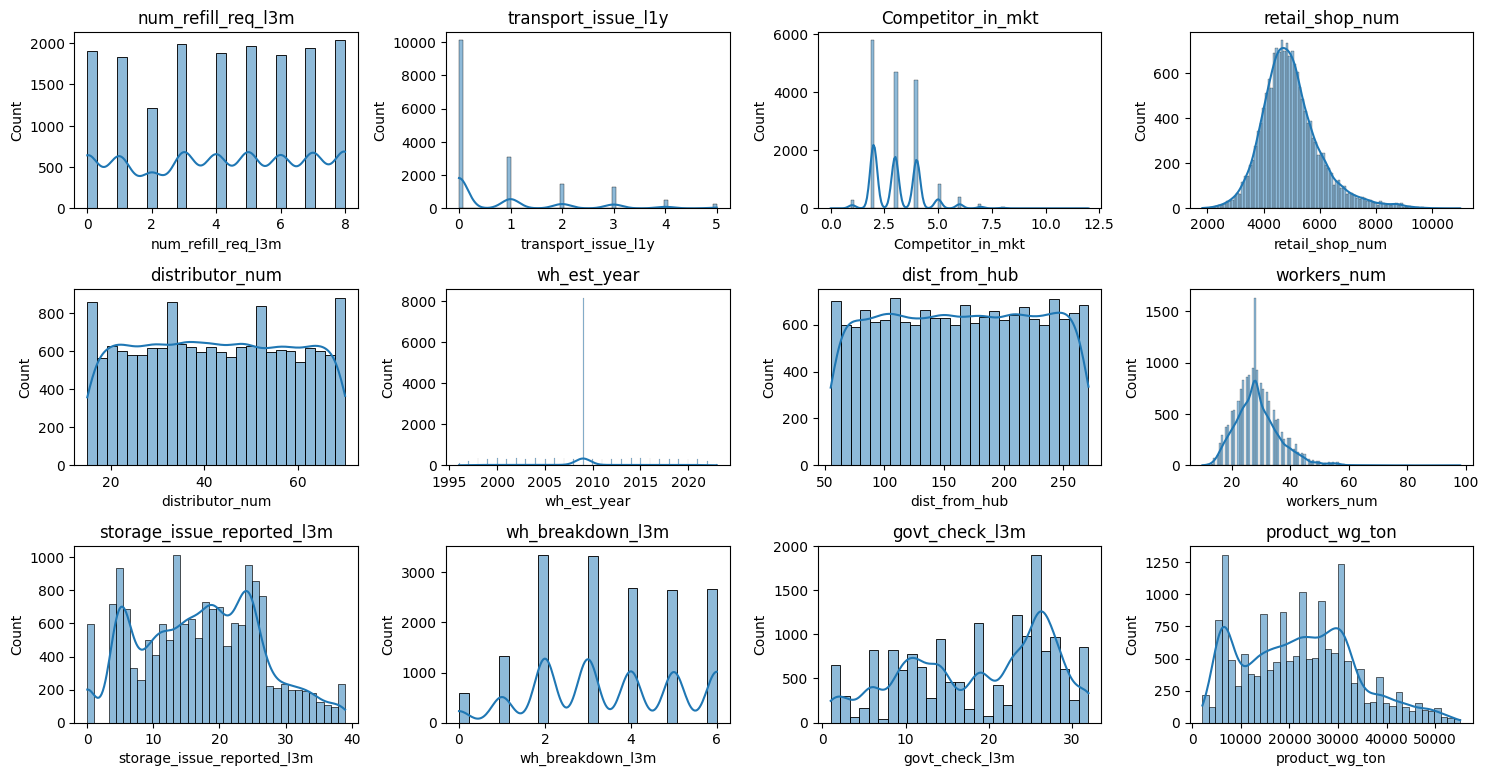

In [214]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df_train[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

## Scatter plots for numerical columns 

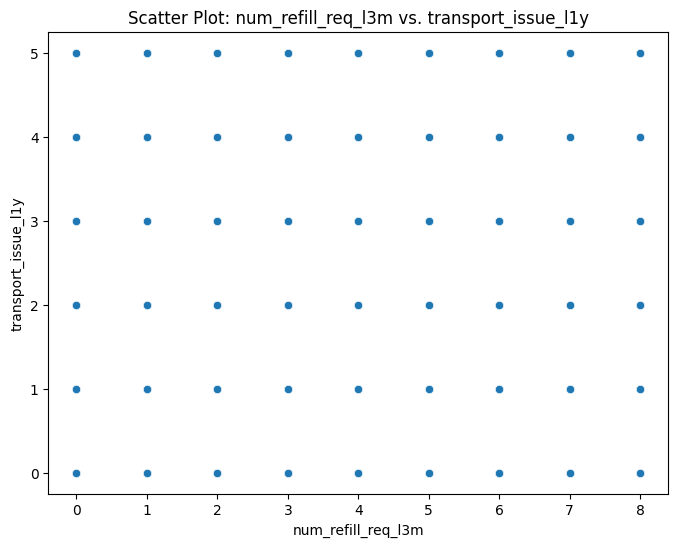

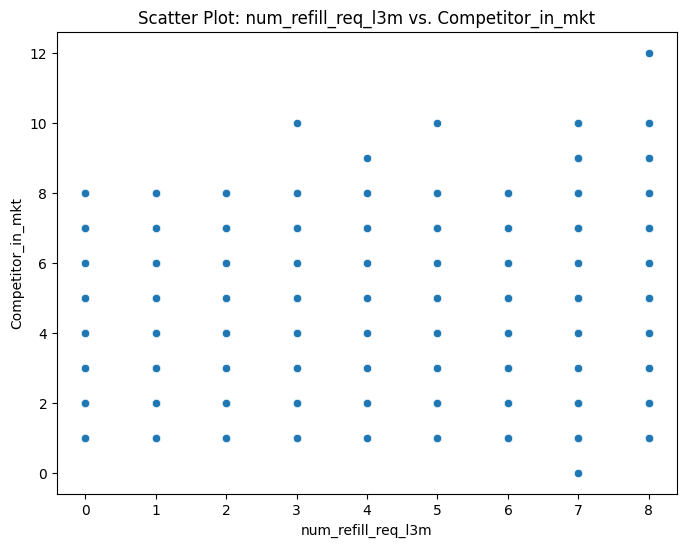

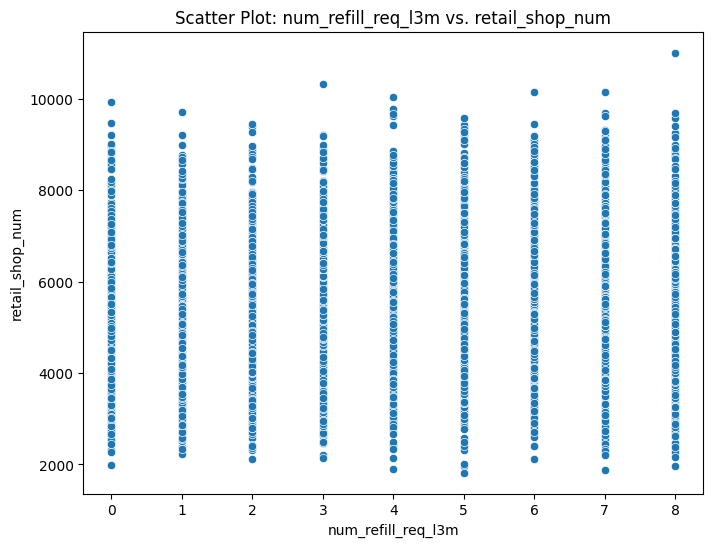

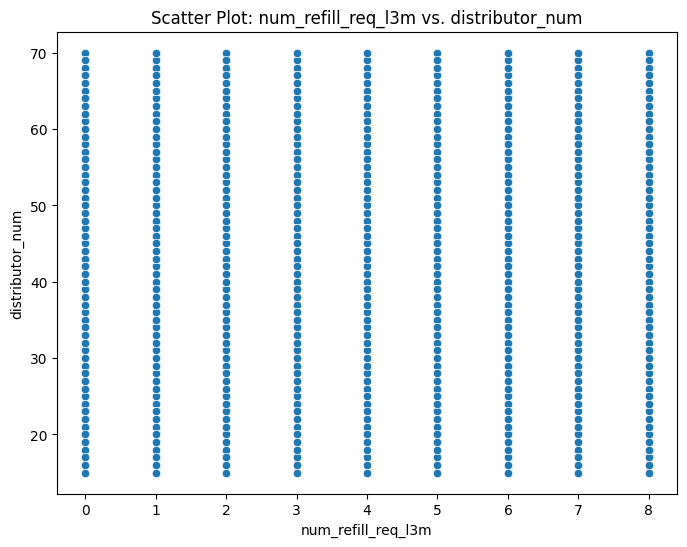

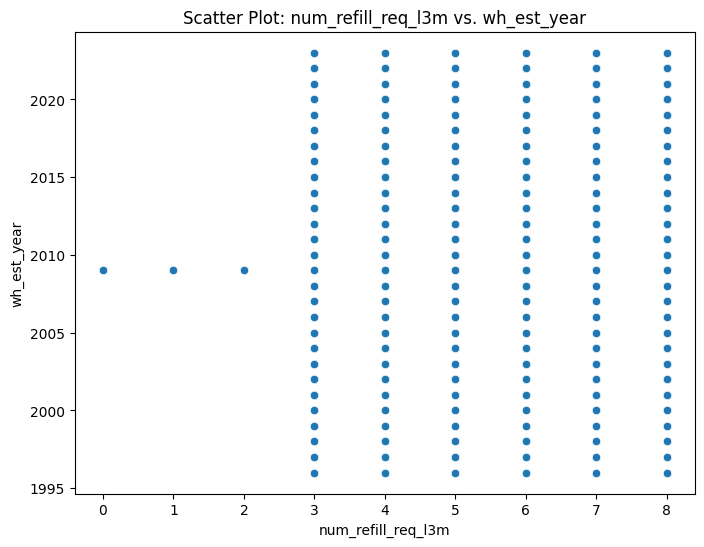

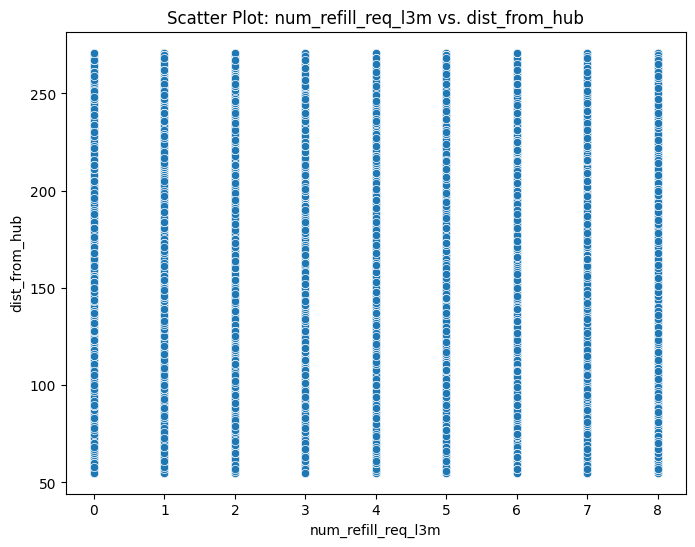

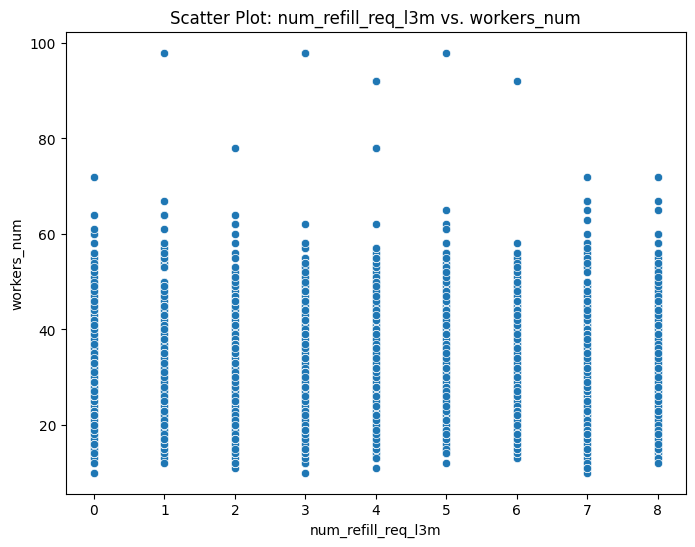

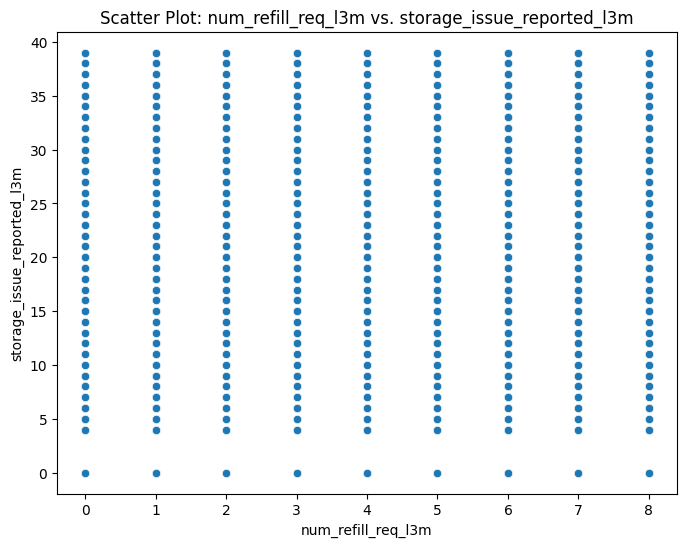

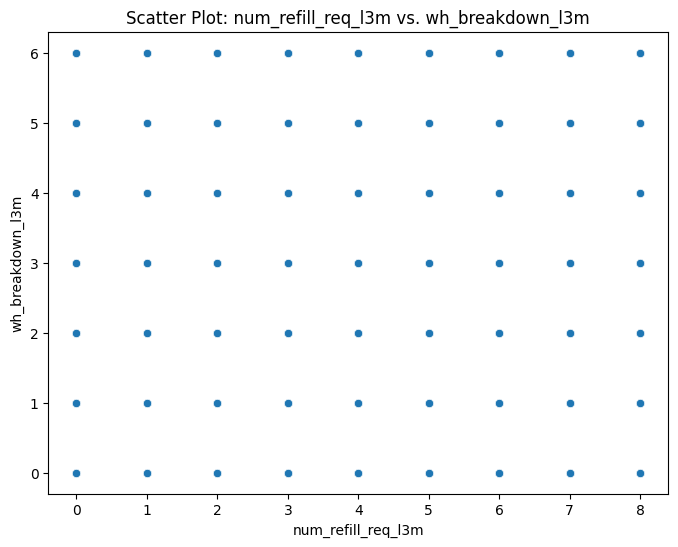

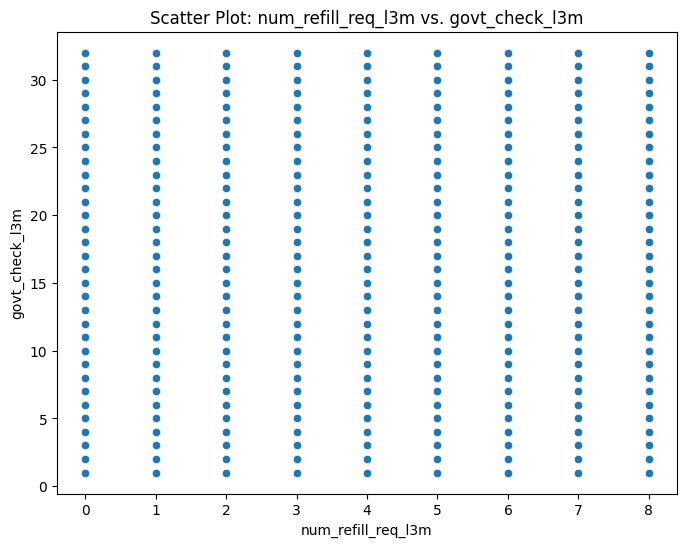

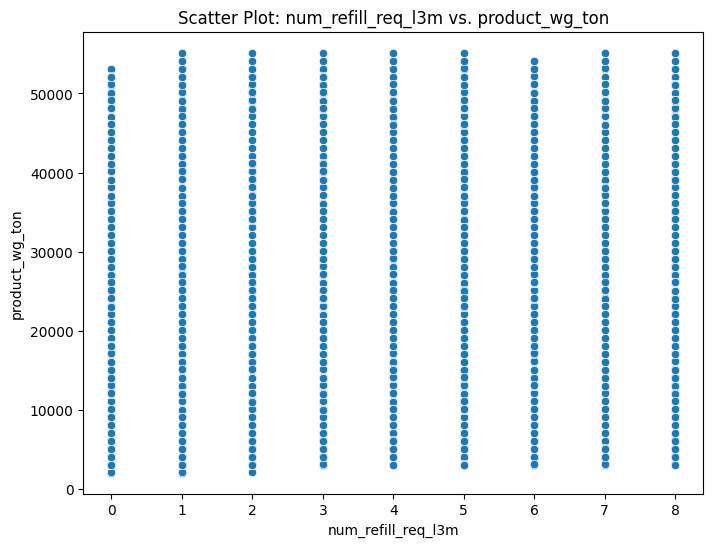

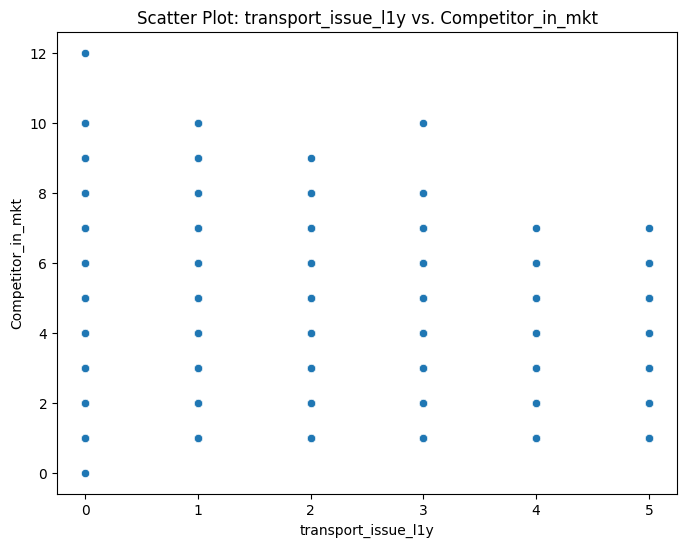

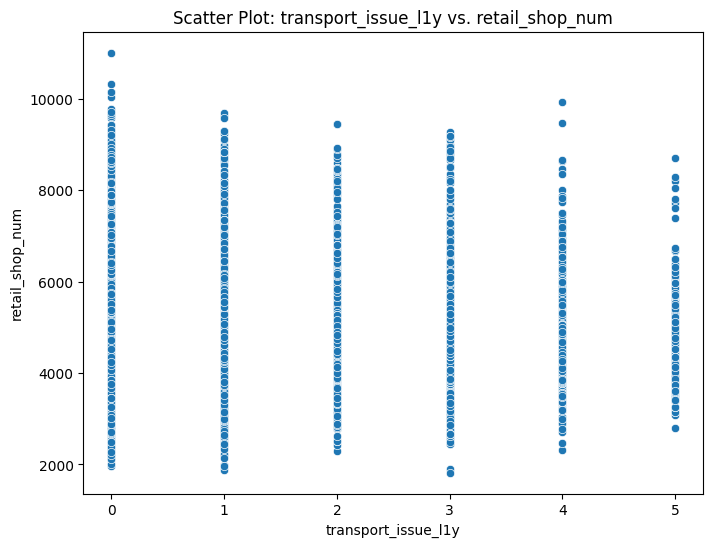

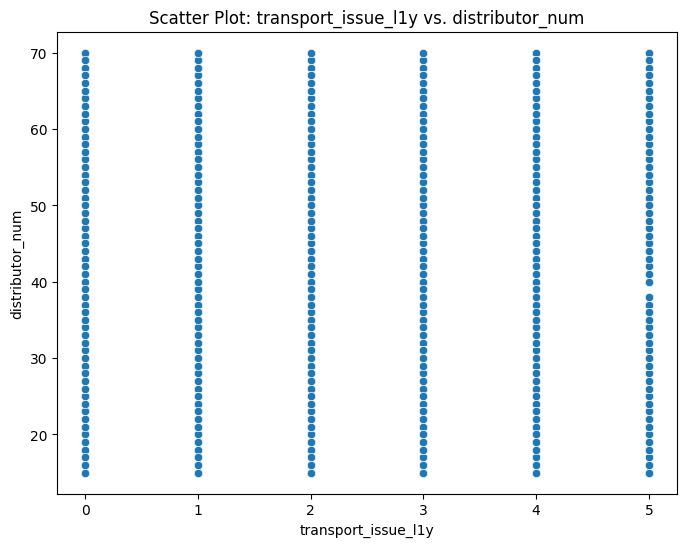

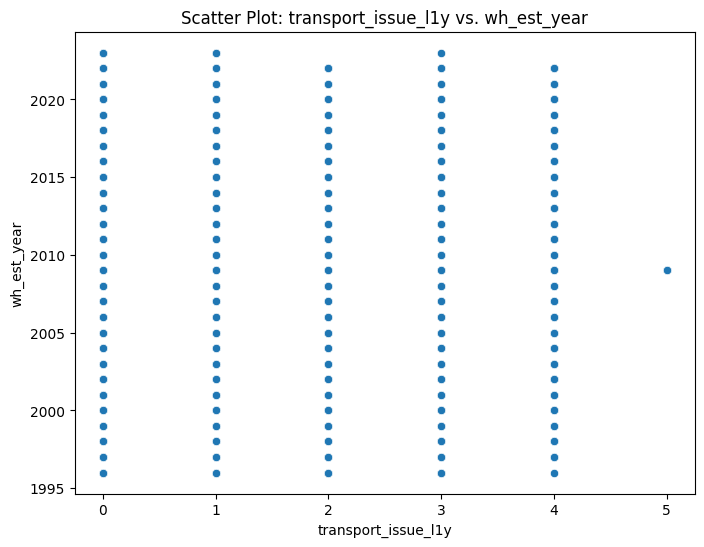

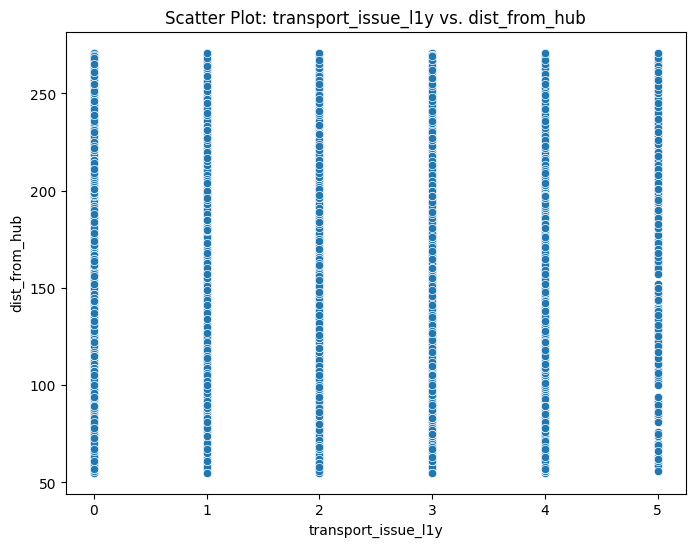

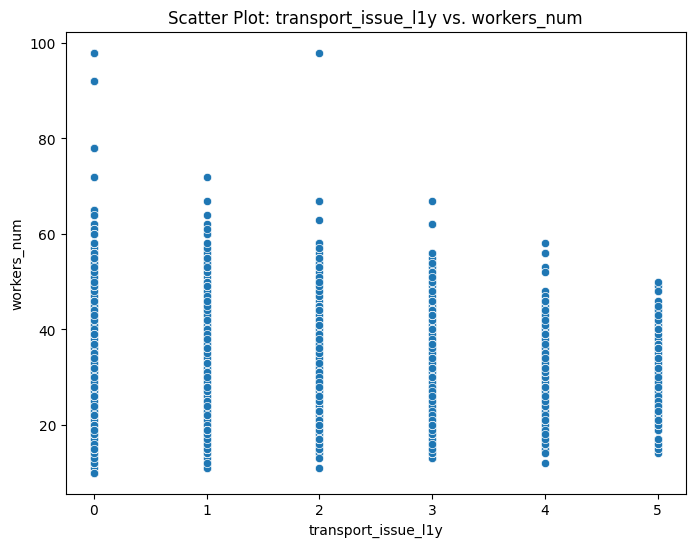

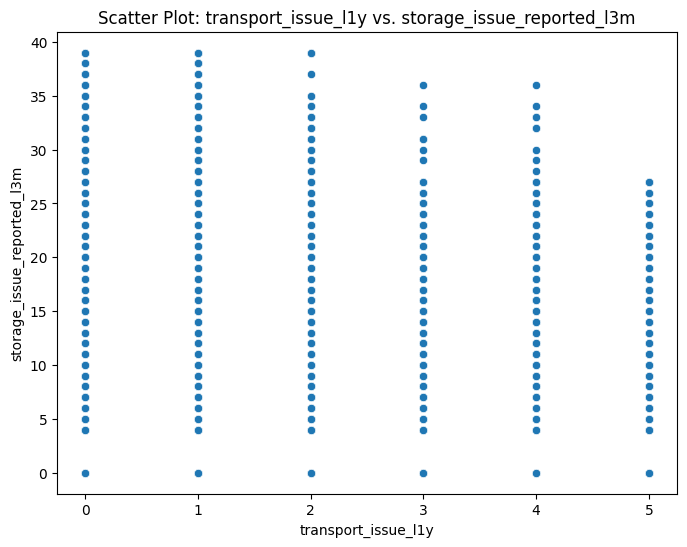

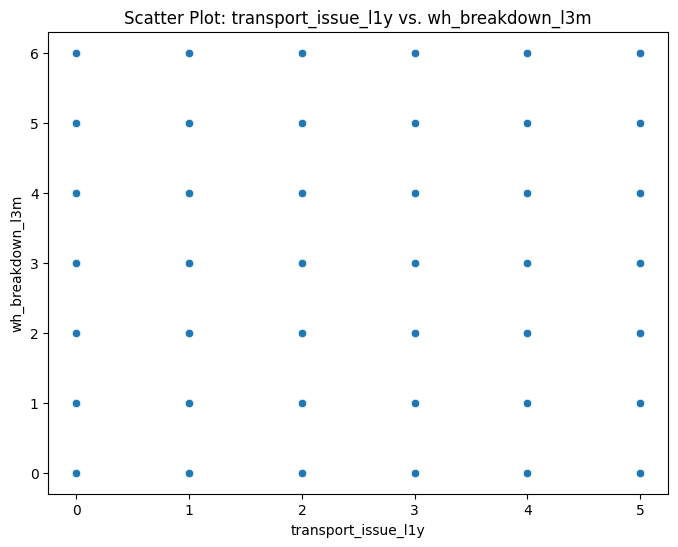

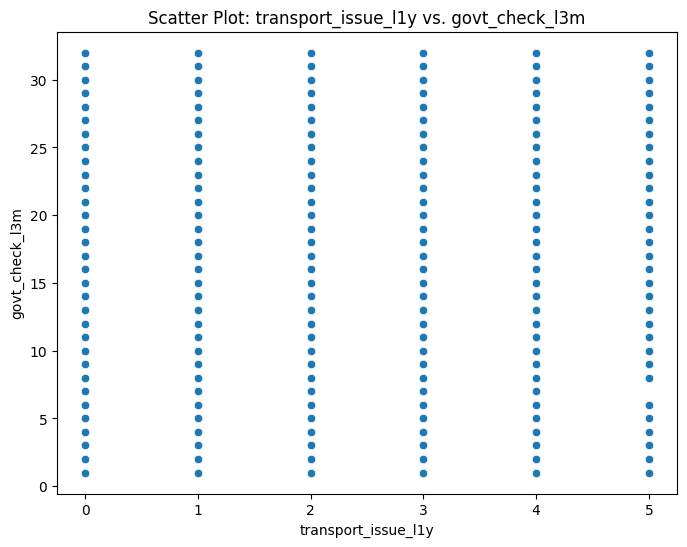

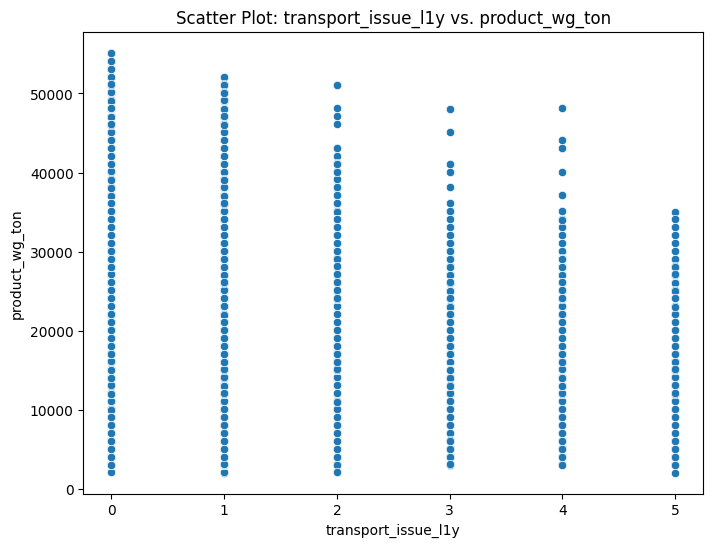

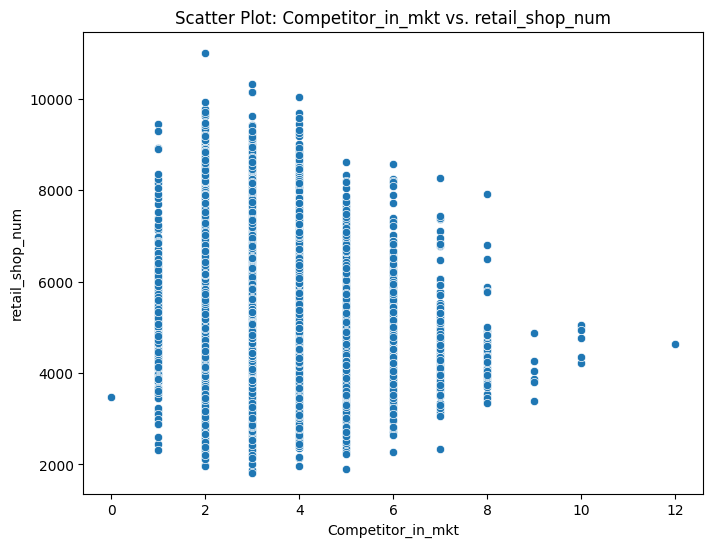

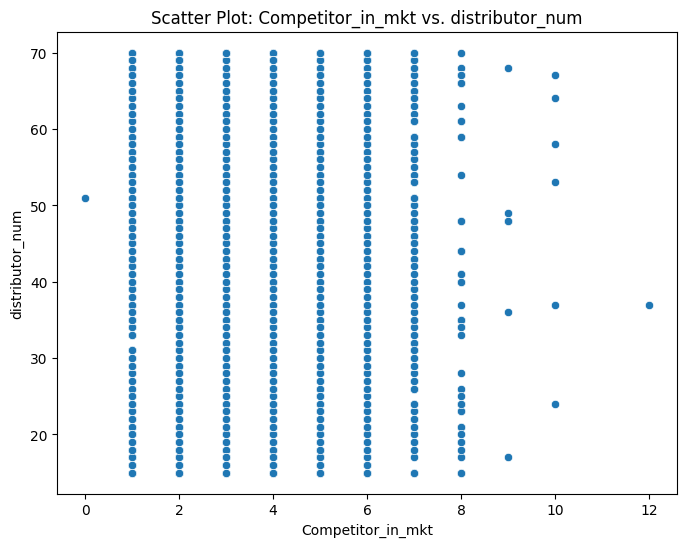

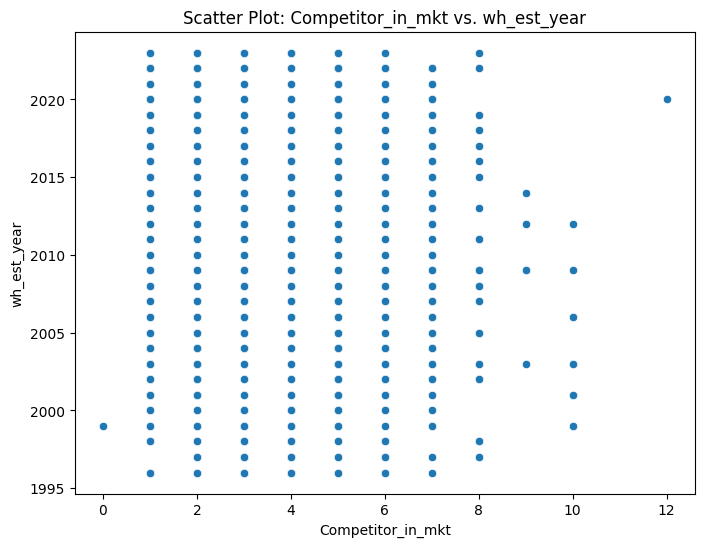

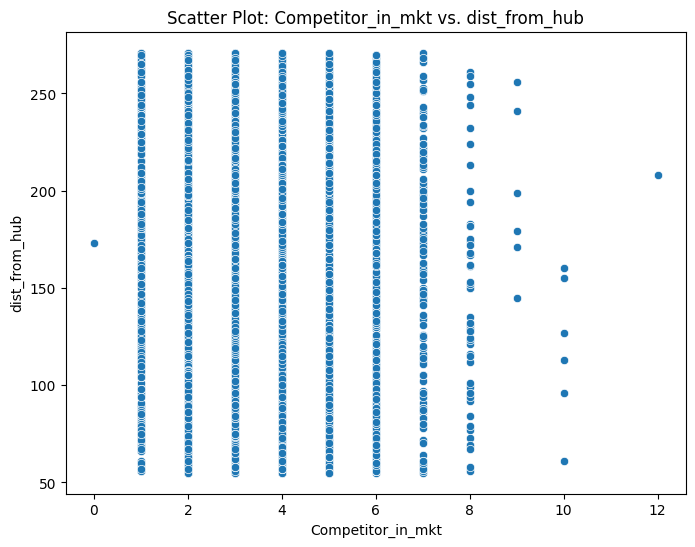

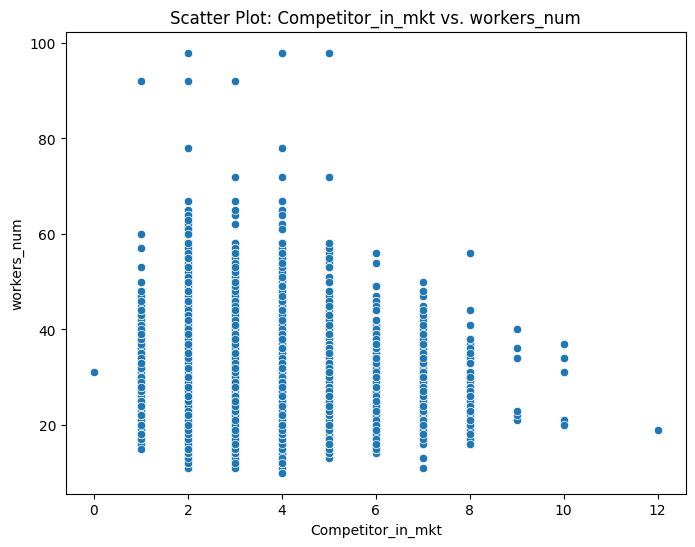

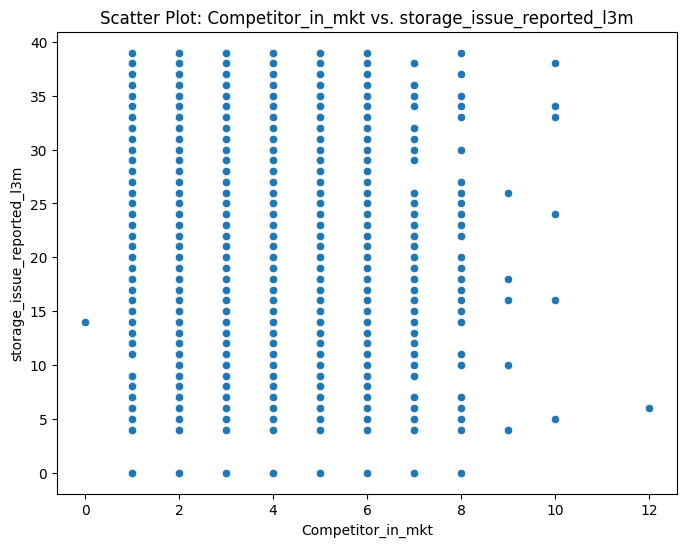

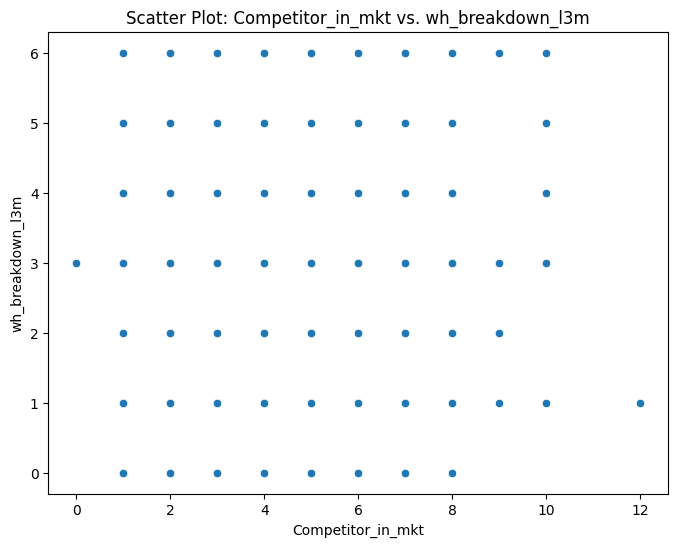

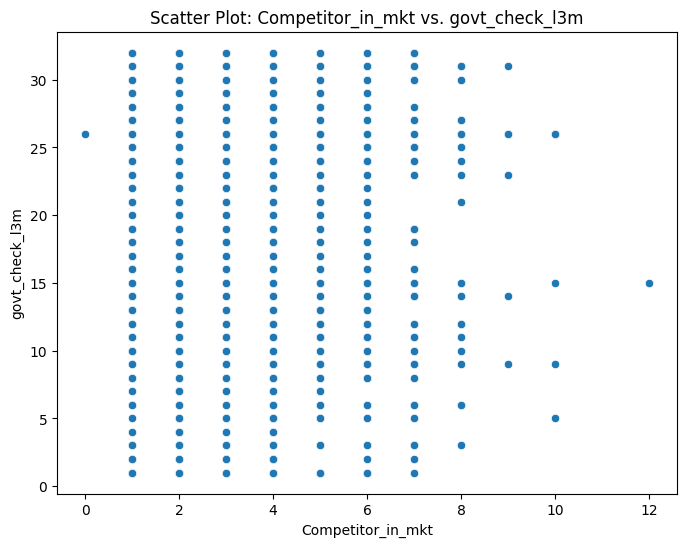

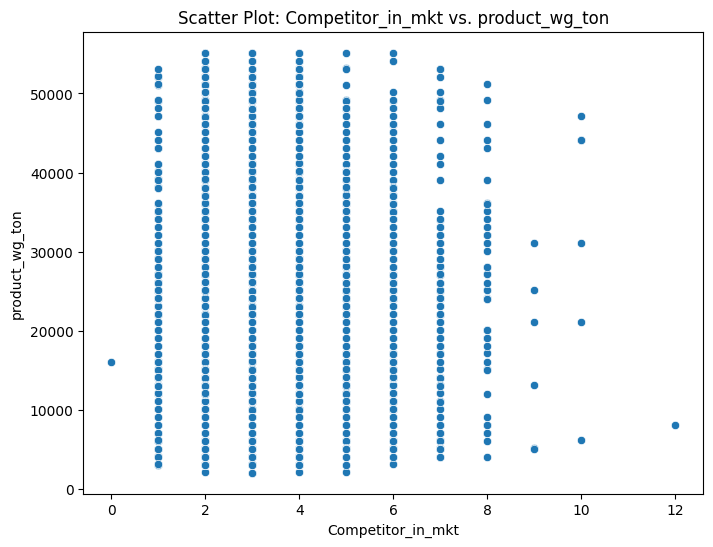

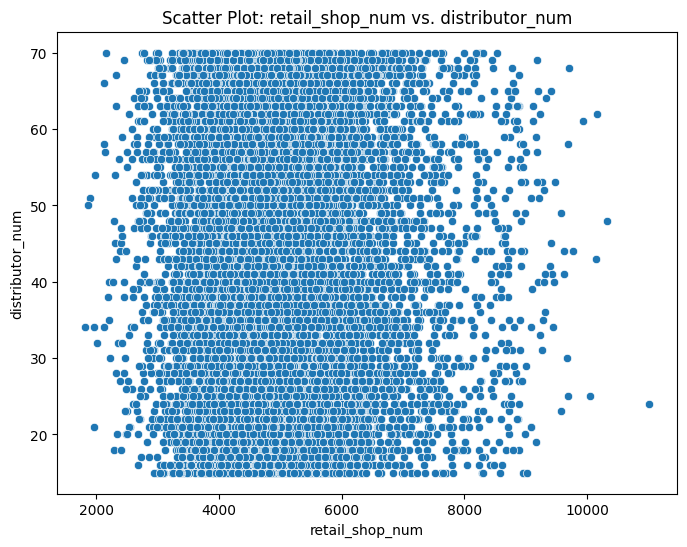

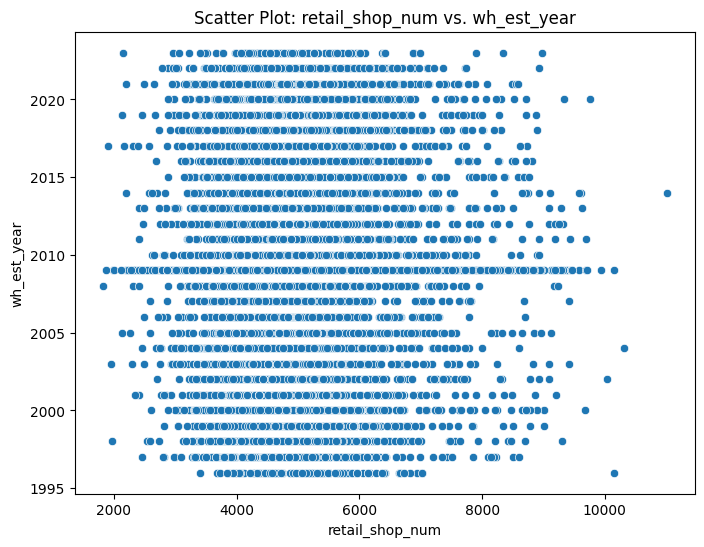

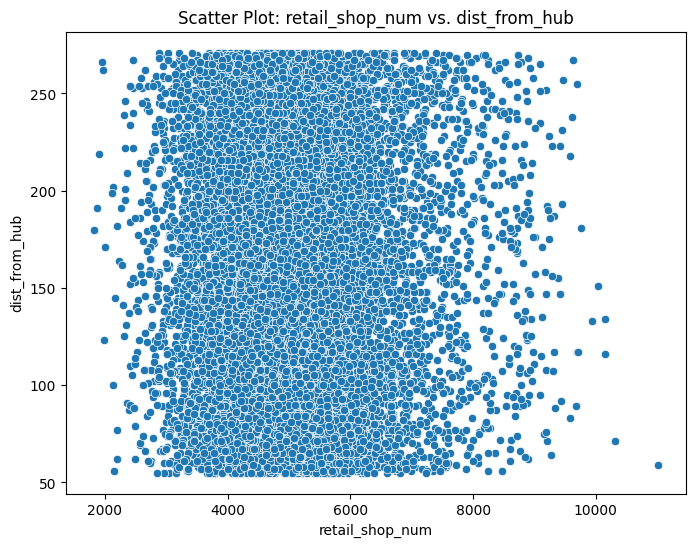

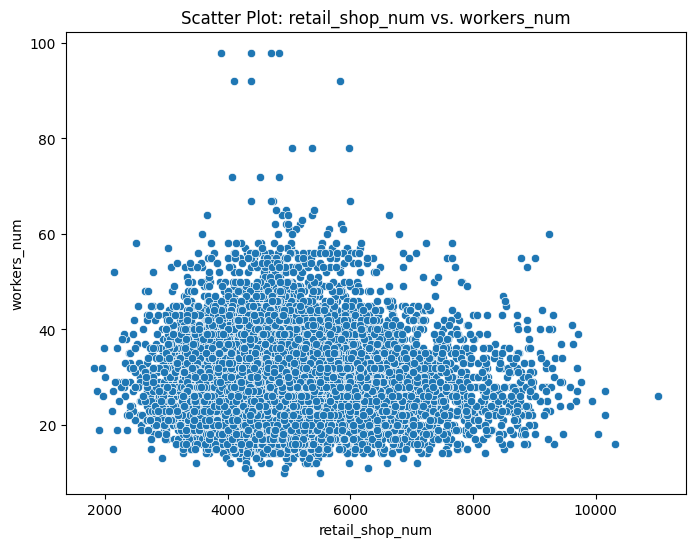

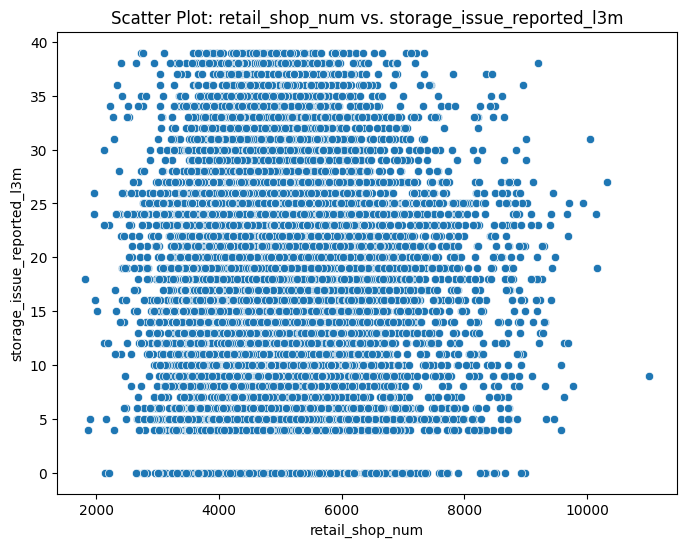

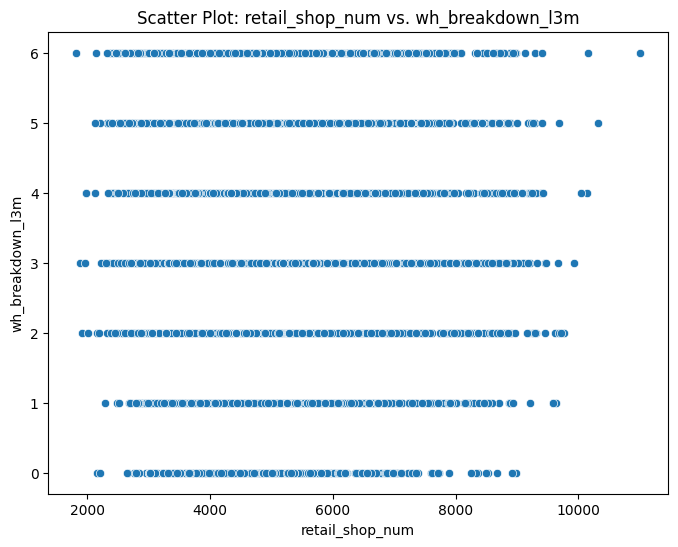

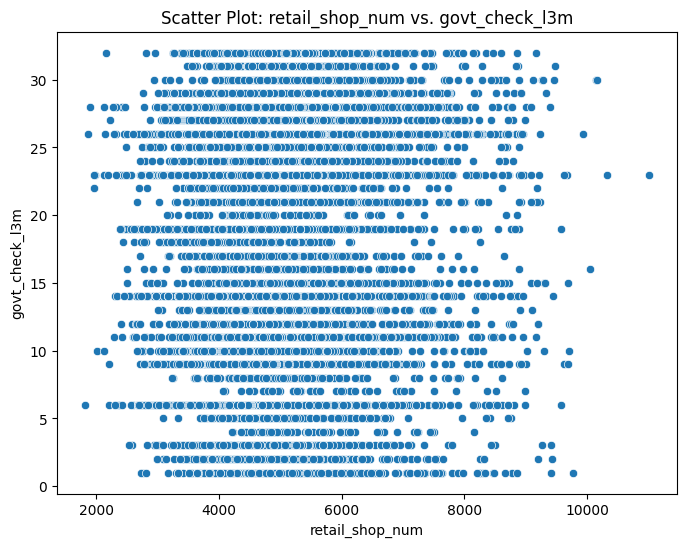

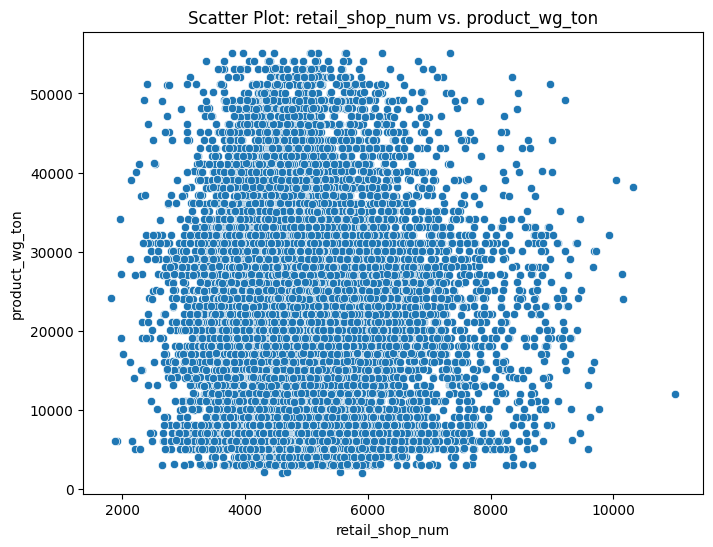

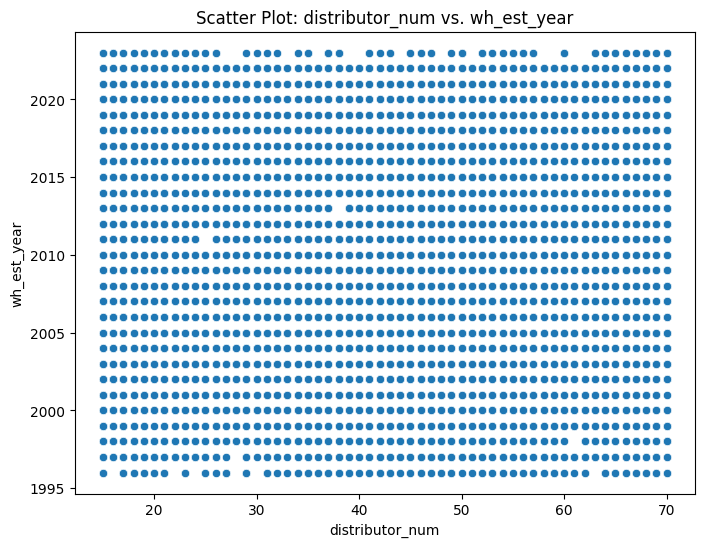

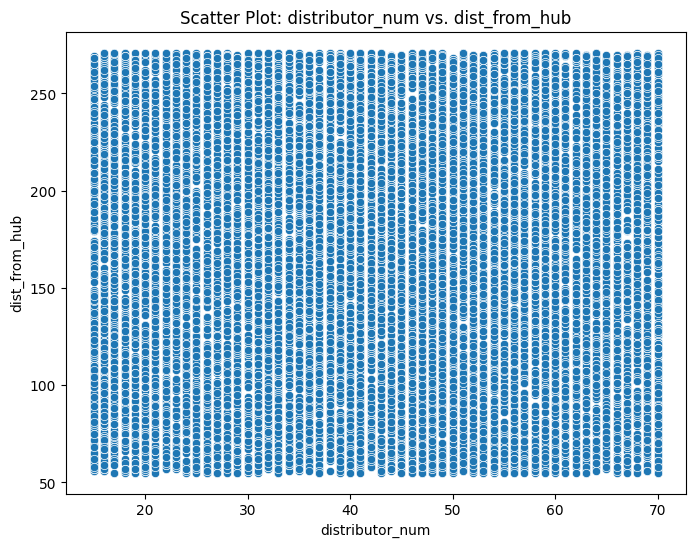

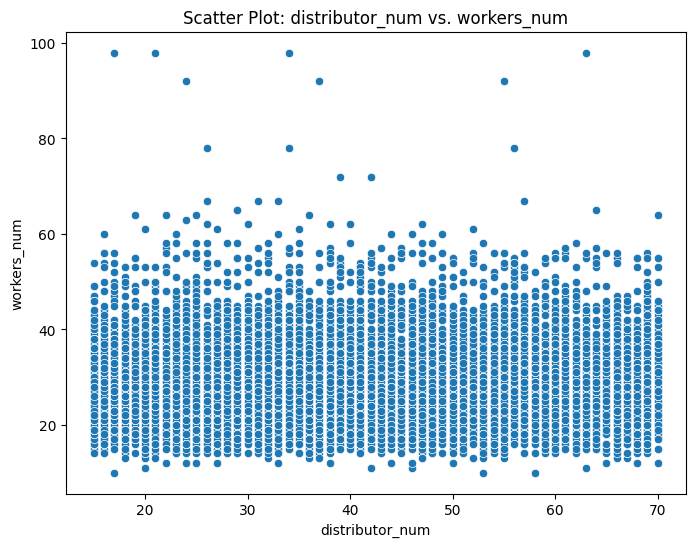

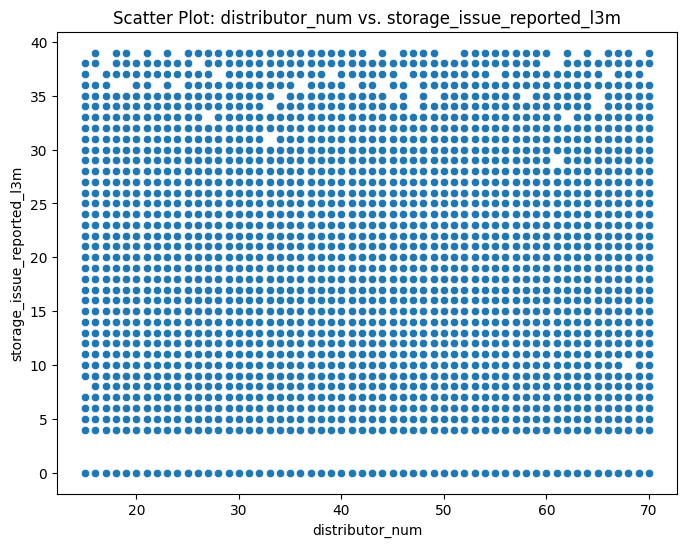

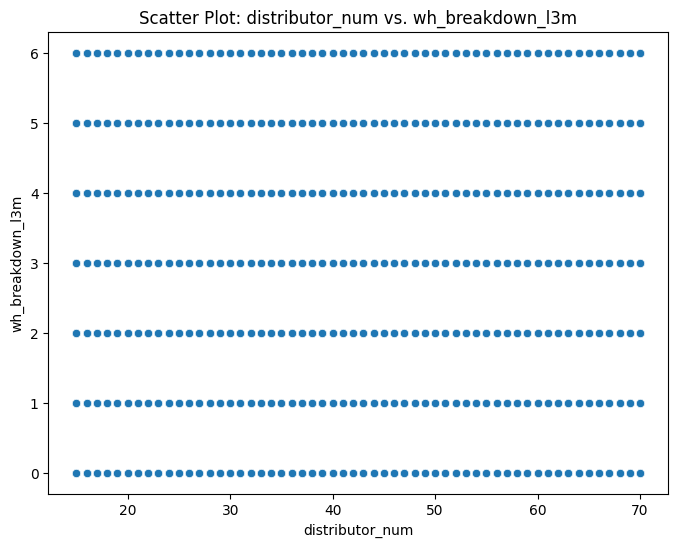

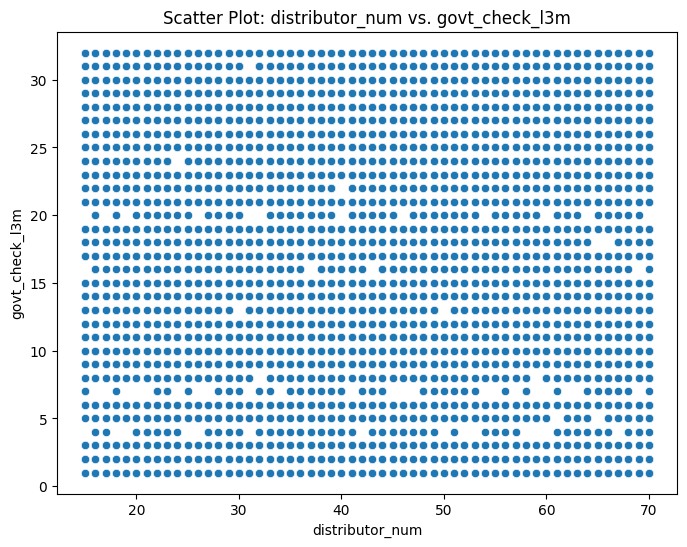

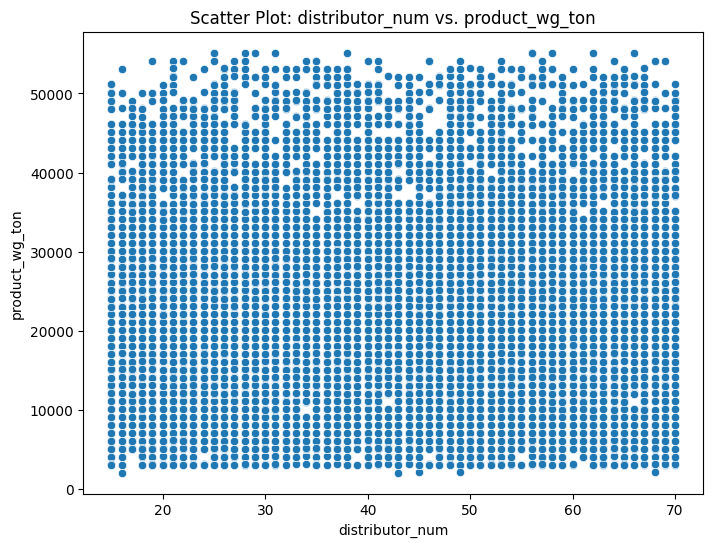

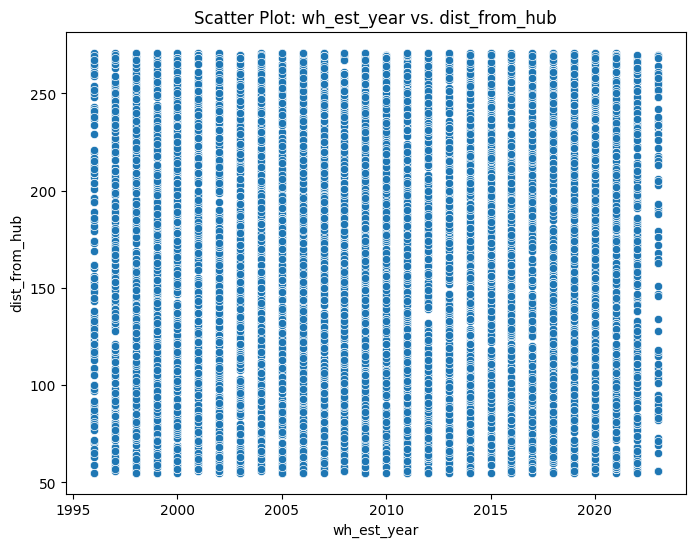

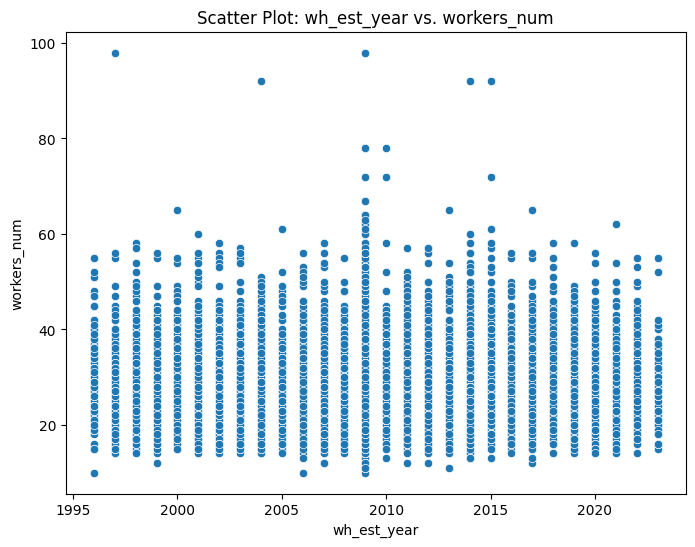

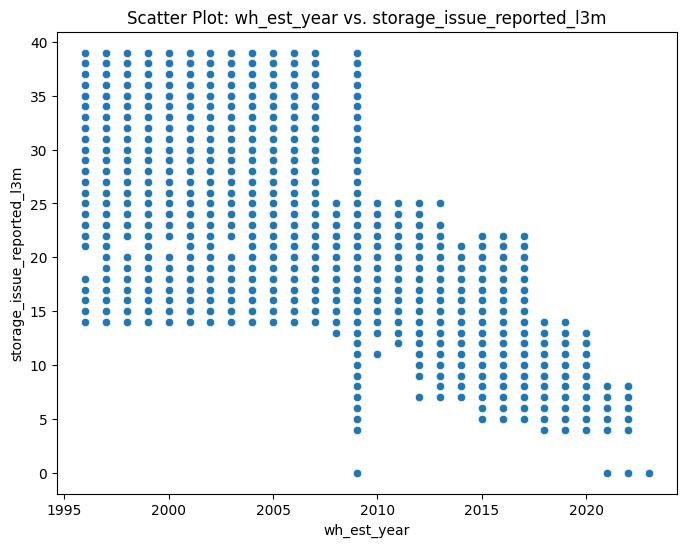

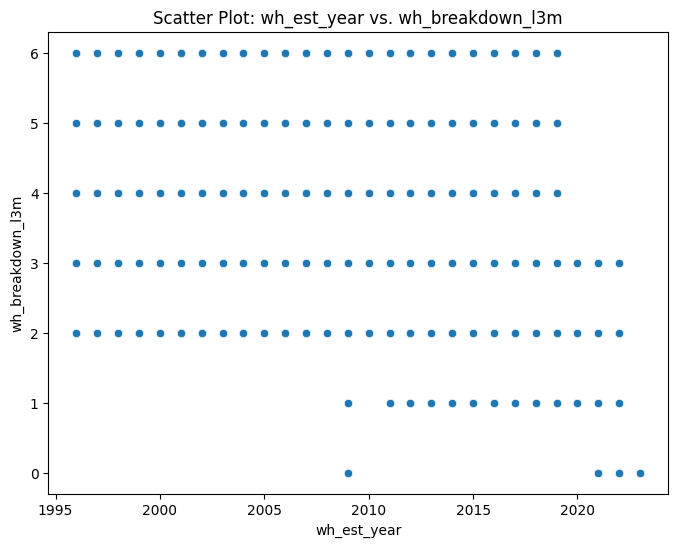

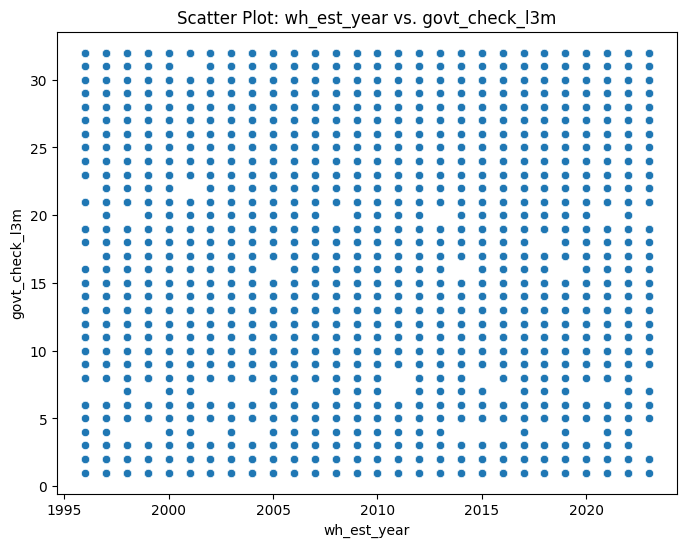

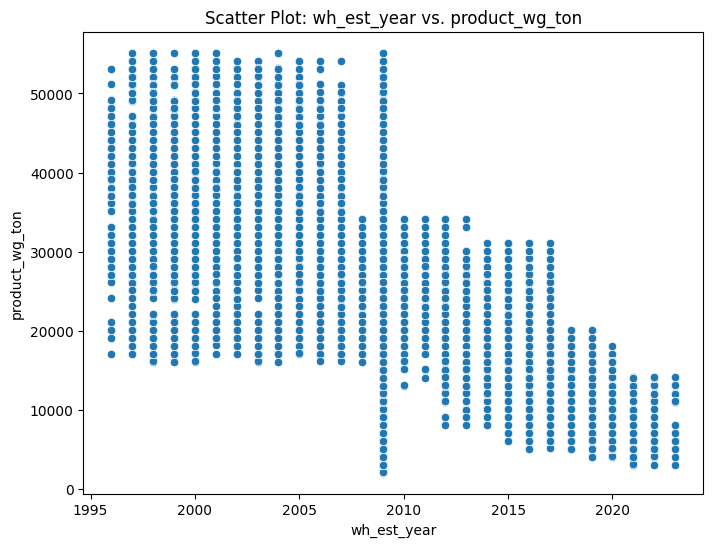

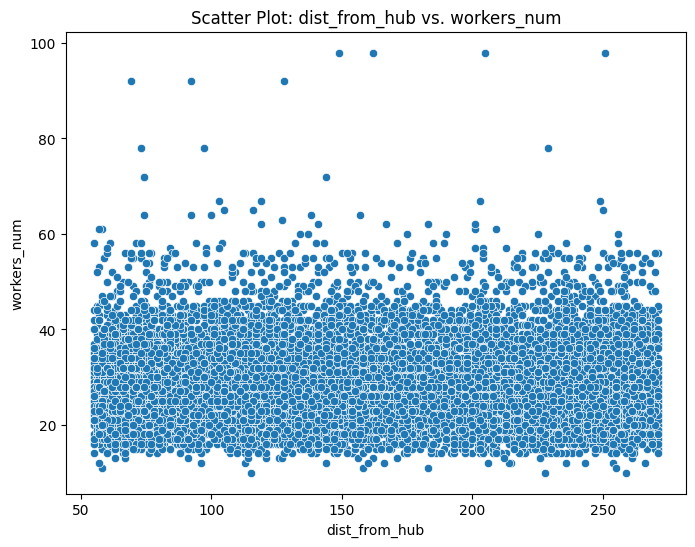

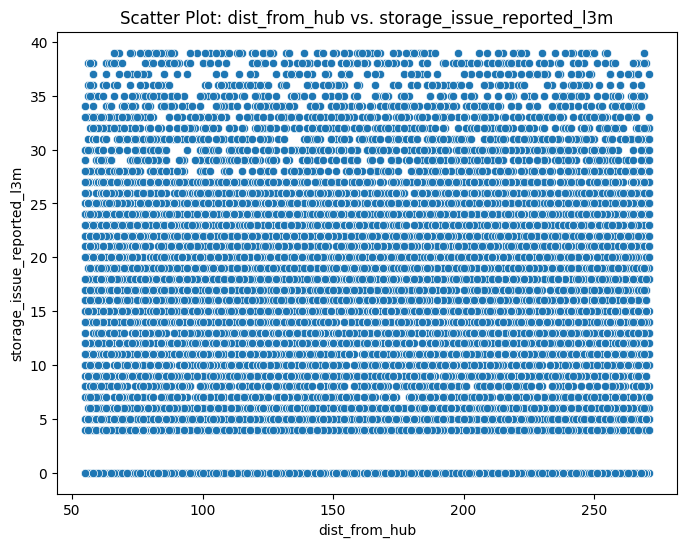

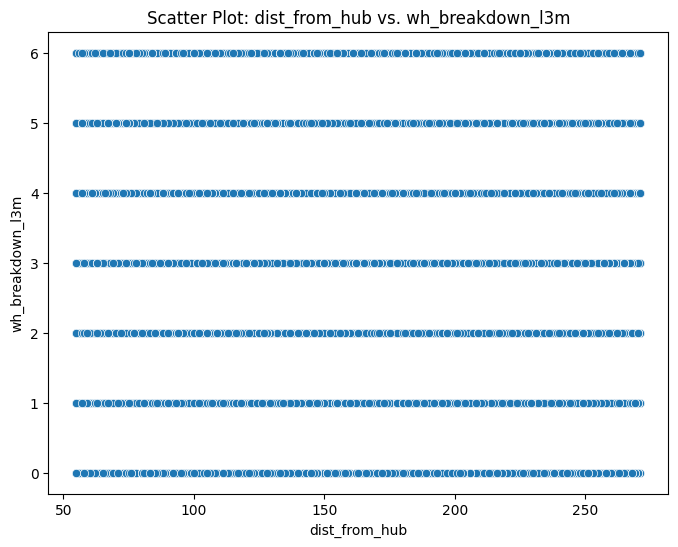

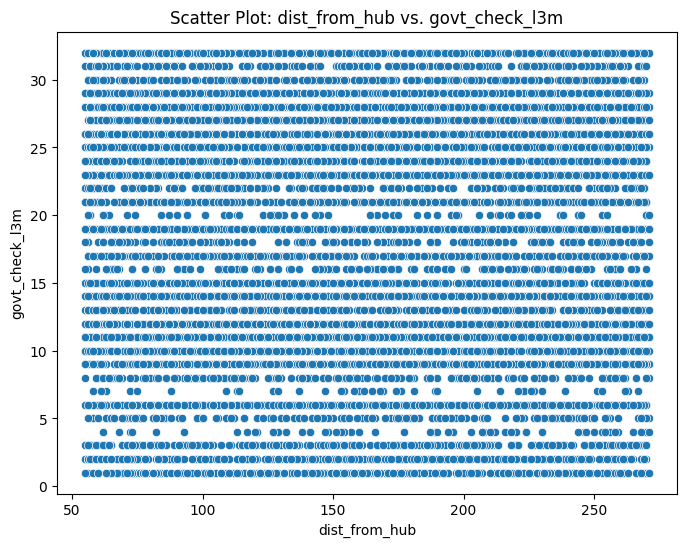

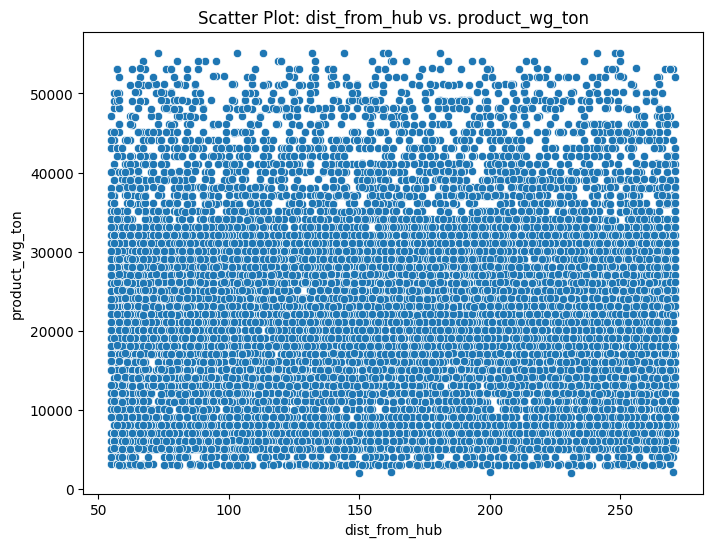

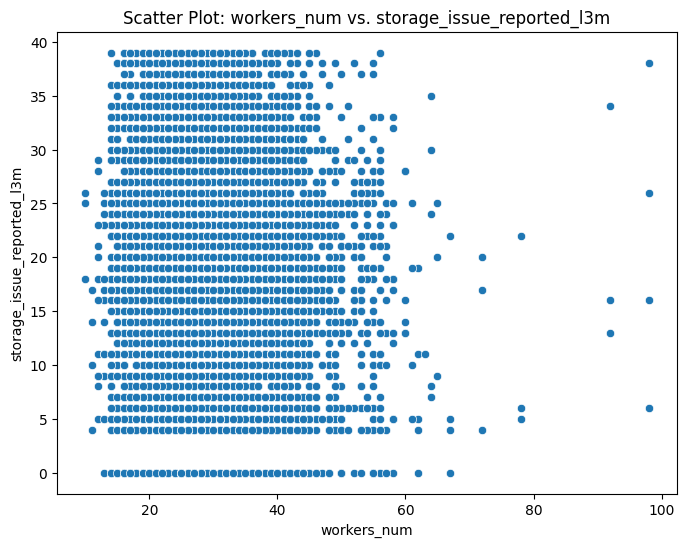

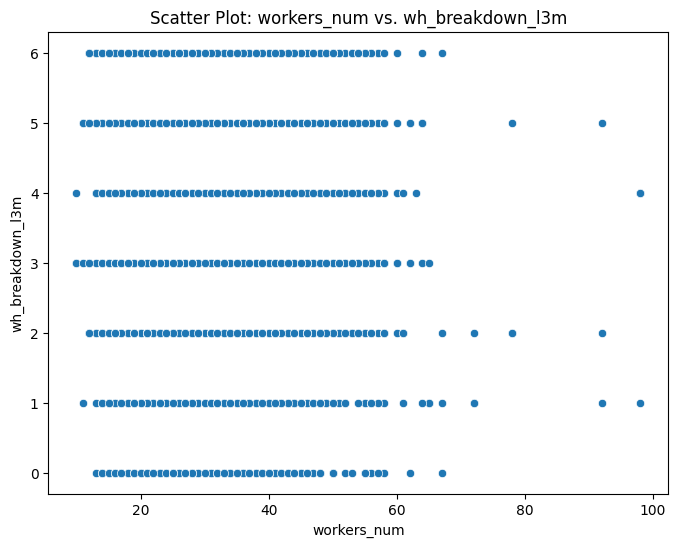

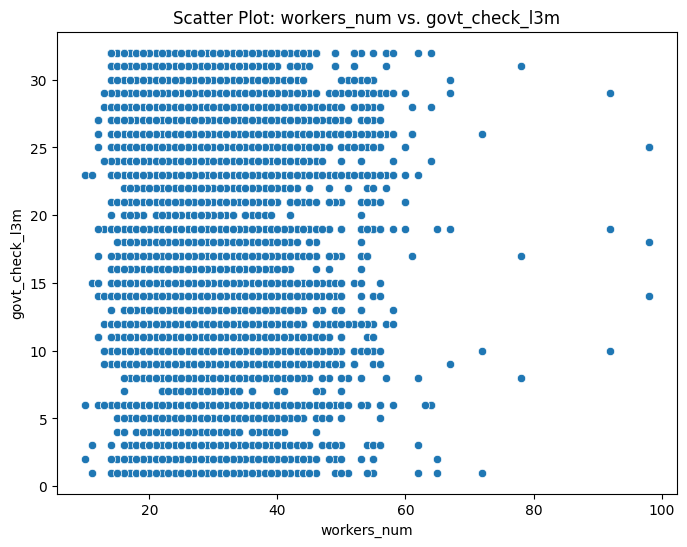

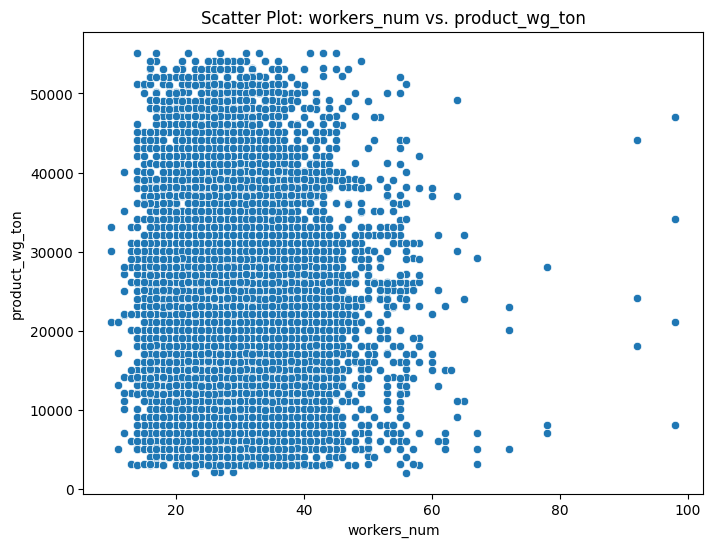

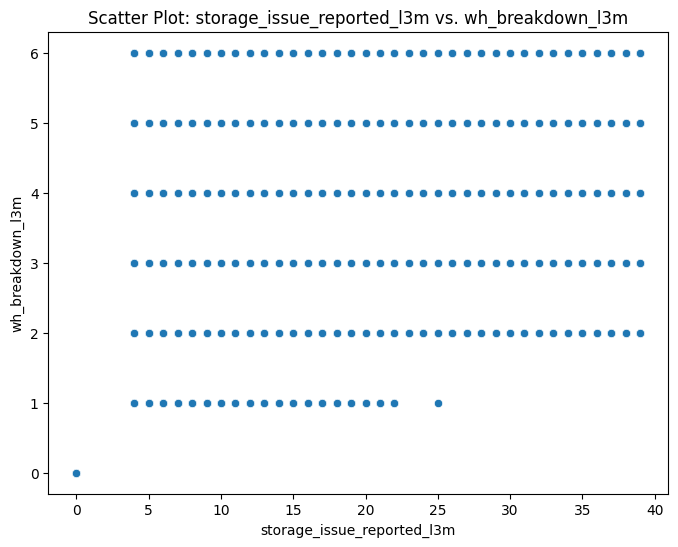

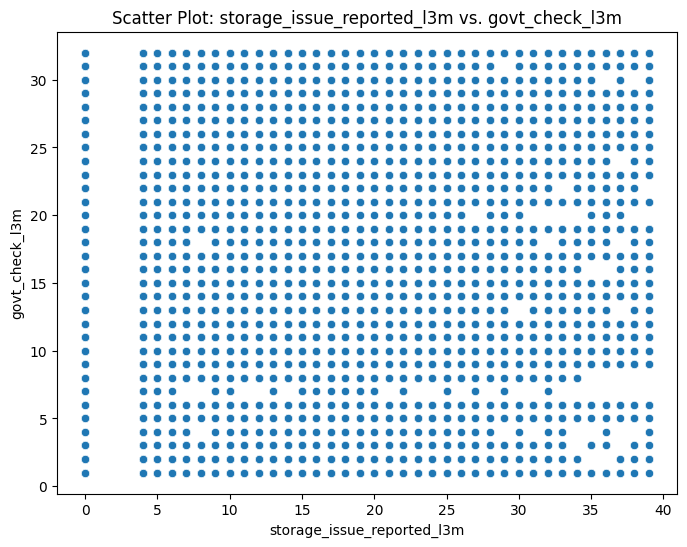

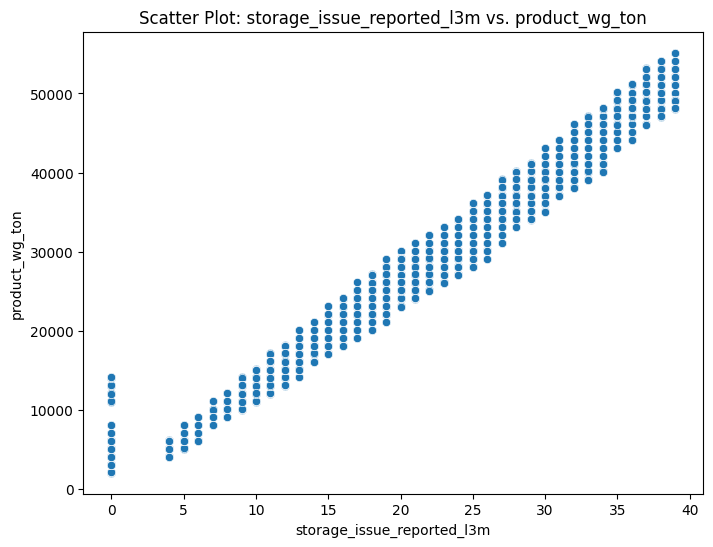

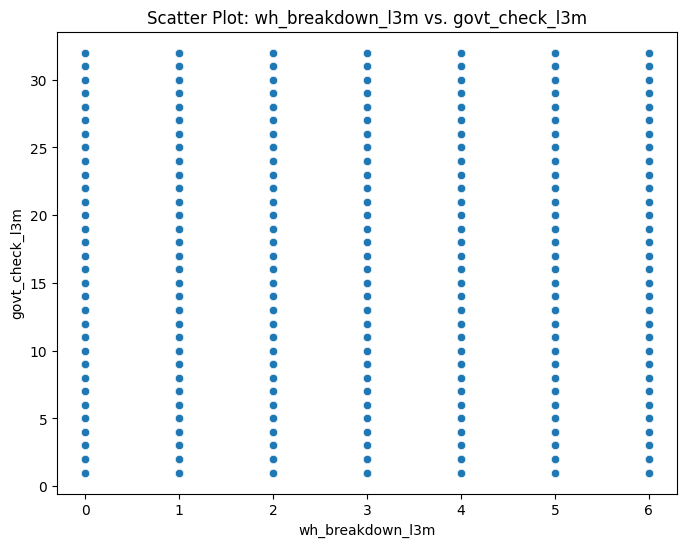

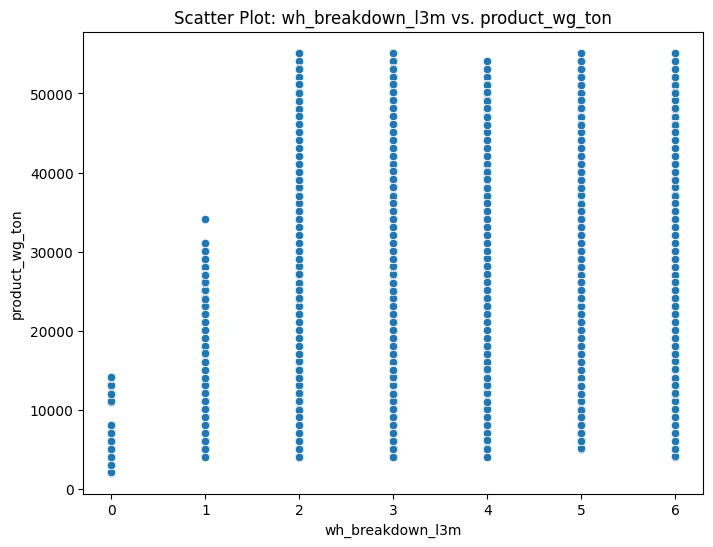

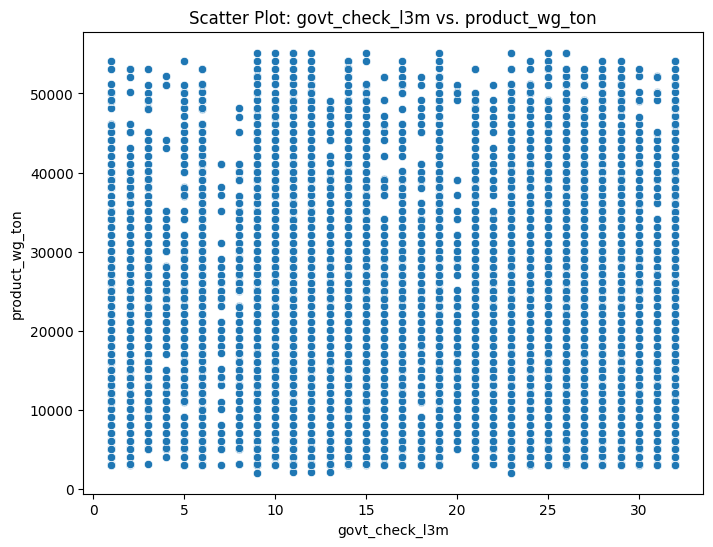

In [215]:
for i in range(len(numerical_columns)):
    for j in range(i+1, len(numerical_columns)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=numerical_columns[i], y=numerical_columns[j], data=df_train)
        plt.title(f'Scatter Plot: {numerical_columns[i]} vs. {numerical_columns[j]}')
        plt.show()

## Count Plot

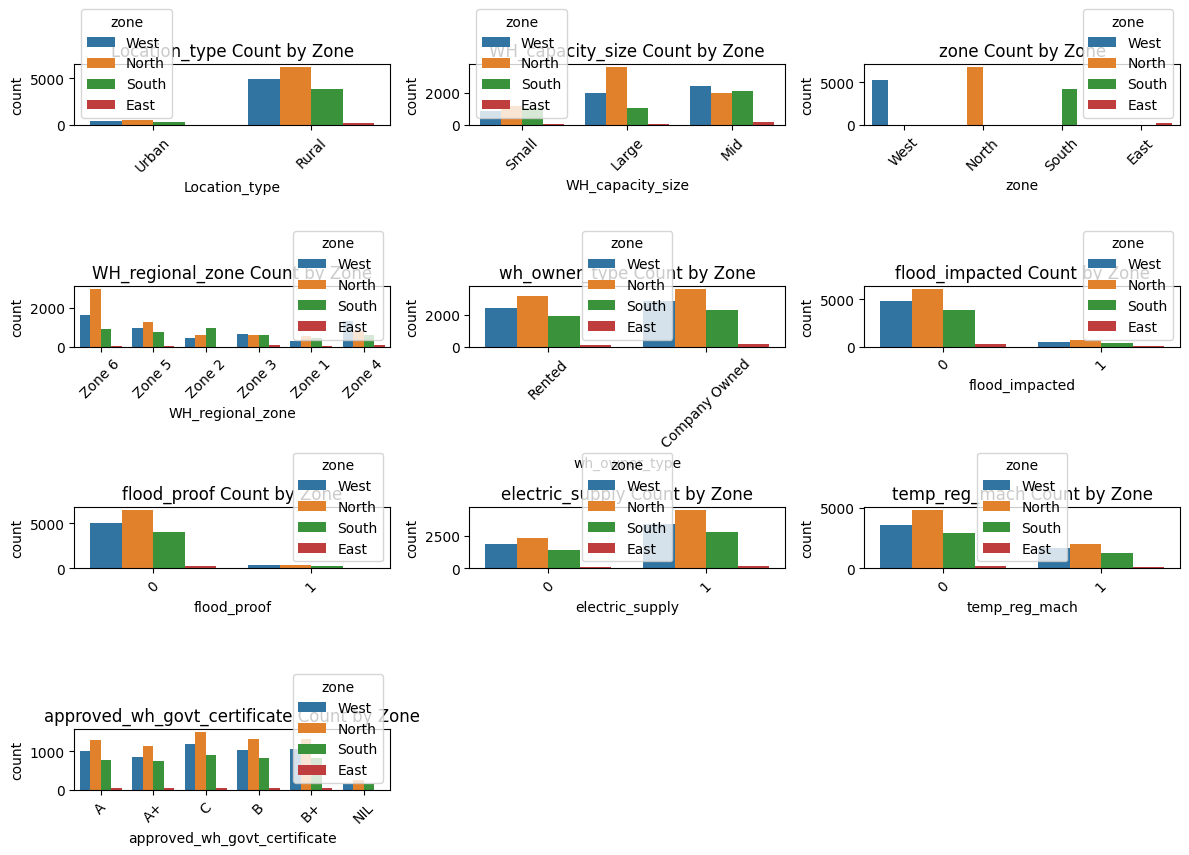

In [216]:
plt.figure(figsize=(12, 10))
for i, feature in enumerate(categorical_columns, 1):
    plt.subplot(5, 3, i)
    sns.countplot(data=df_train, x=feature, hue='zone')
    plt.xticks(rotation=45)
    plt.title(f'{feature} Count by Zone')

plt.tight_layout()
plt.show()

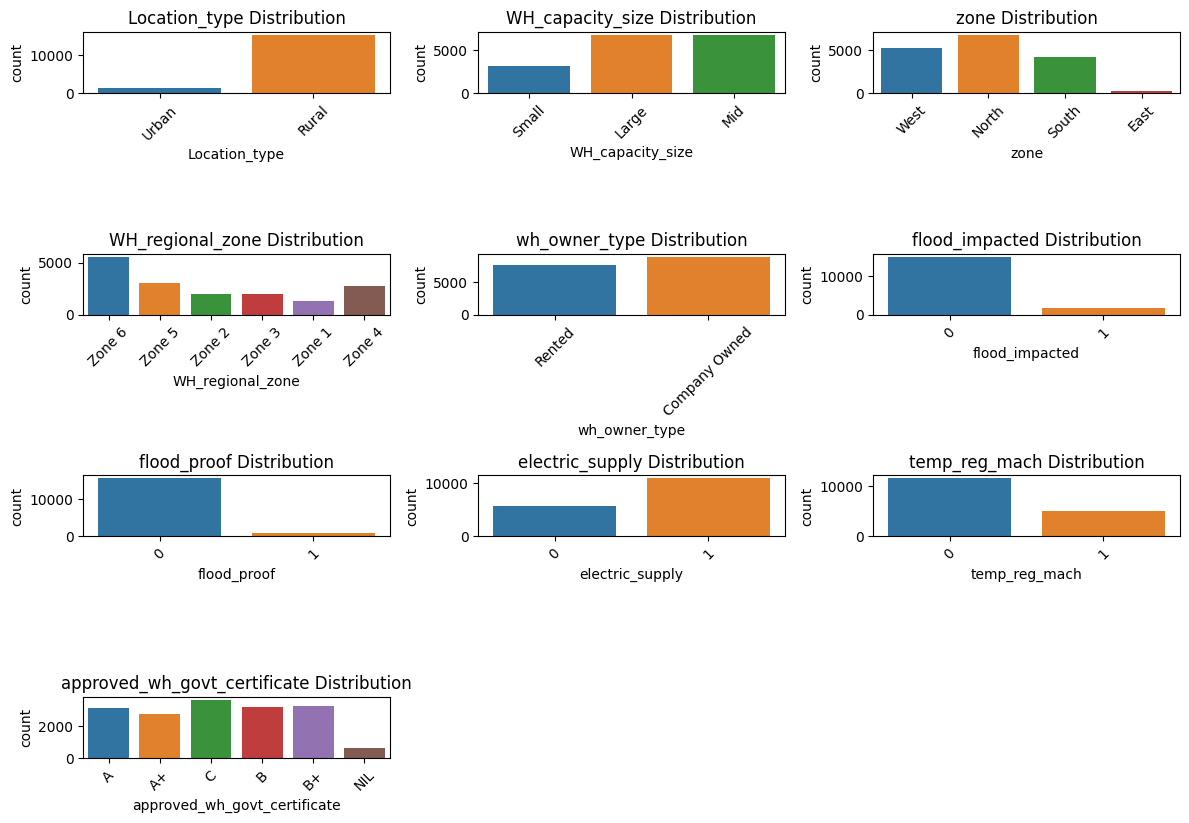

In [217]:
plt.figure(figsize=(12, 10))
for i, feature in enumerate(categorical_columns, 1):
    plt.subplot(5, 3, i)
    sns.countplot(data=df_train, x=feature)
    plt.xticks(rotation=45)
    plt.title(f'{feature} Distribution')

plt.tight_layout()
plt.show()

## Correlation Matrix

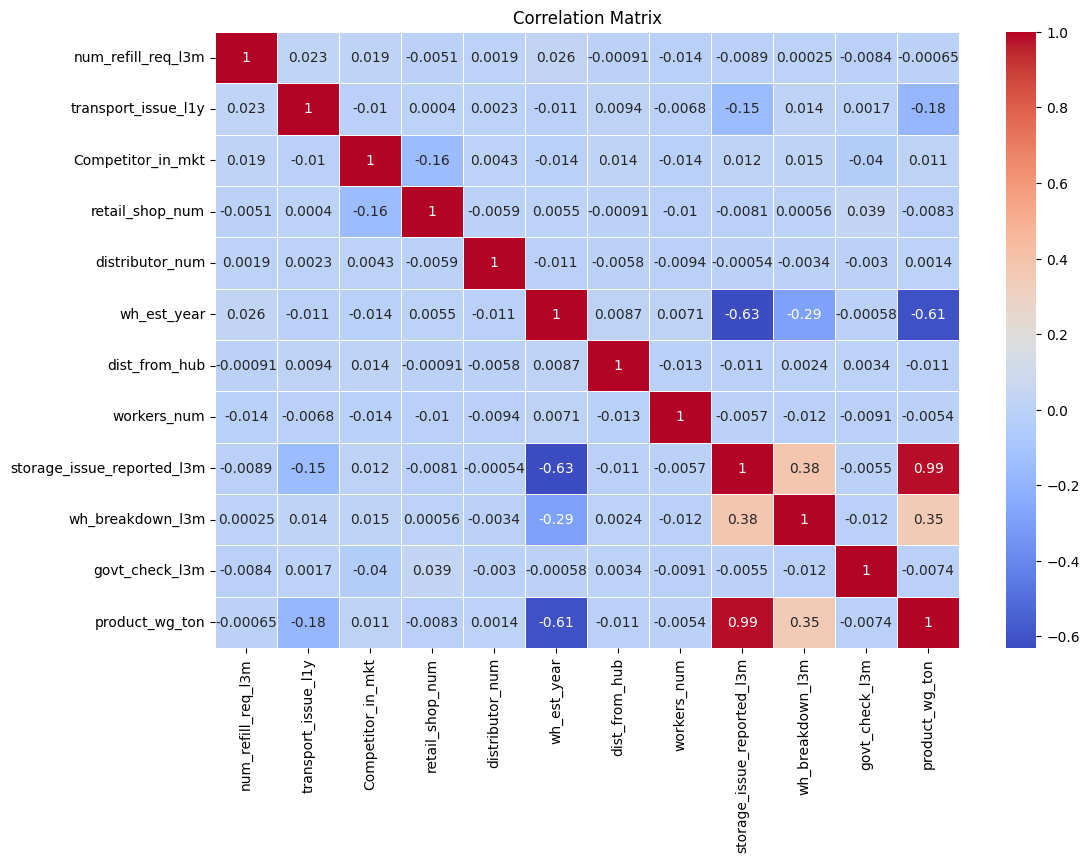

In [218]:
Corr_matrix = df_train[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(Corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## Box Plots

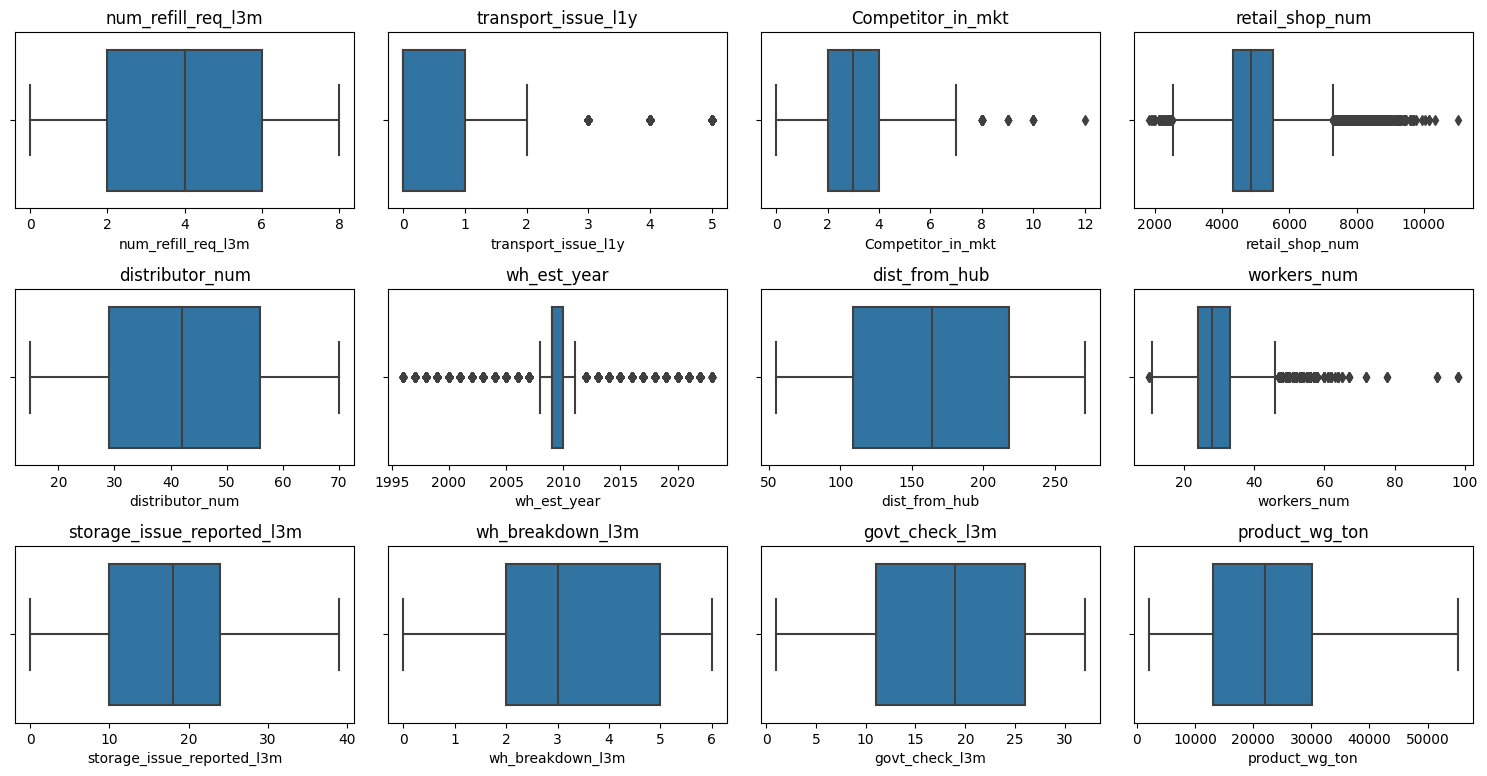

In [219]:
# Plot box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df_train[col])
    plt.title(col)
plt.tight_layout()
plt.show()

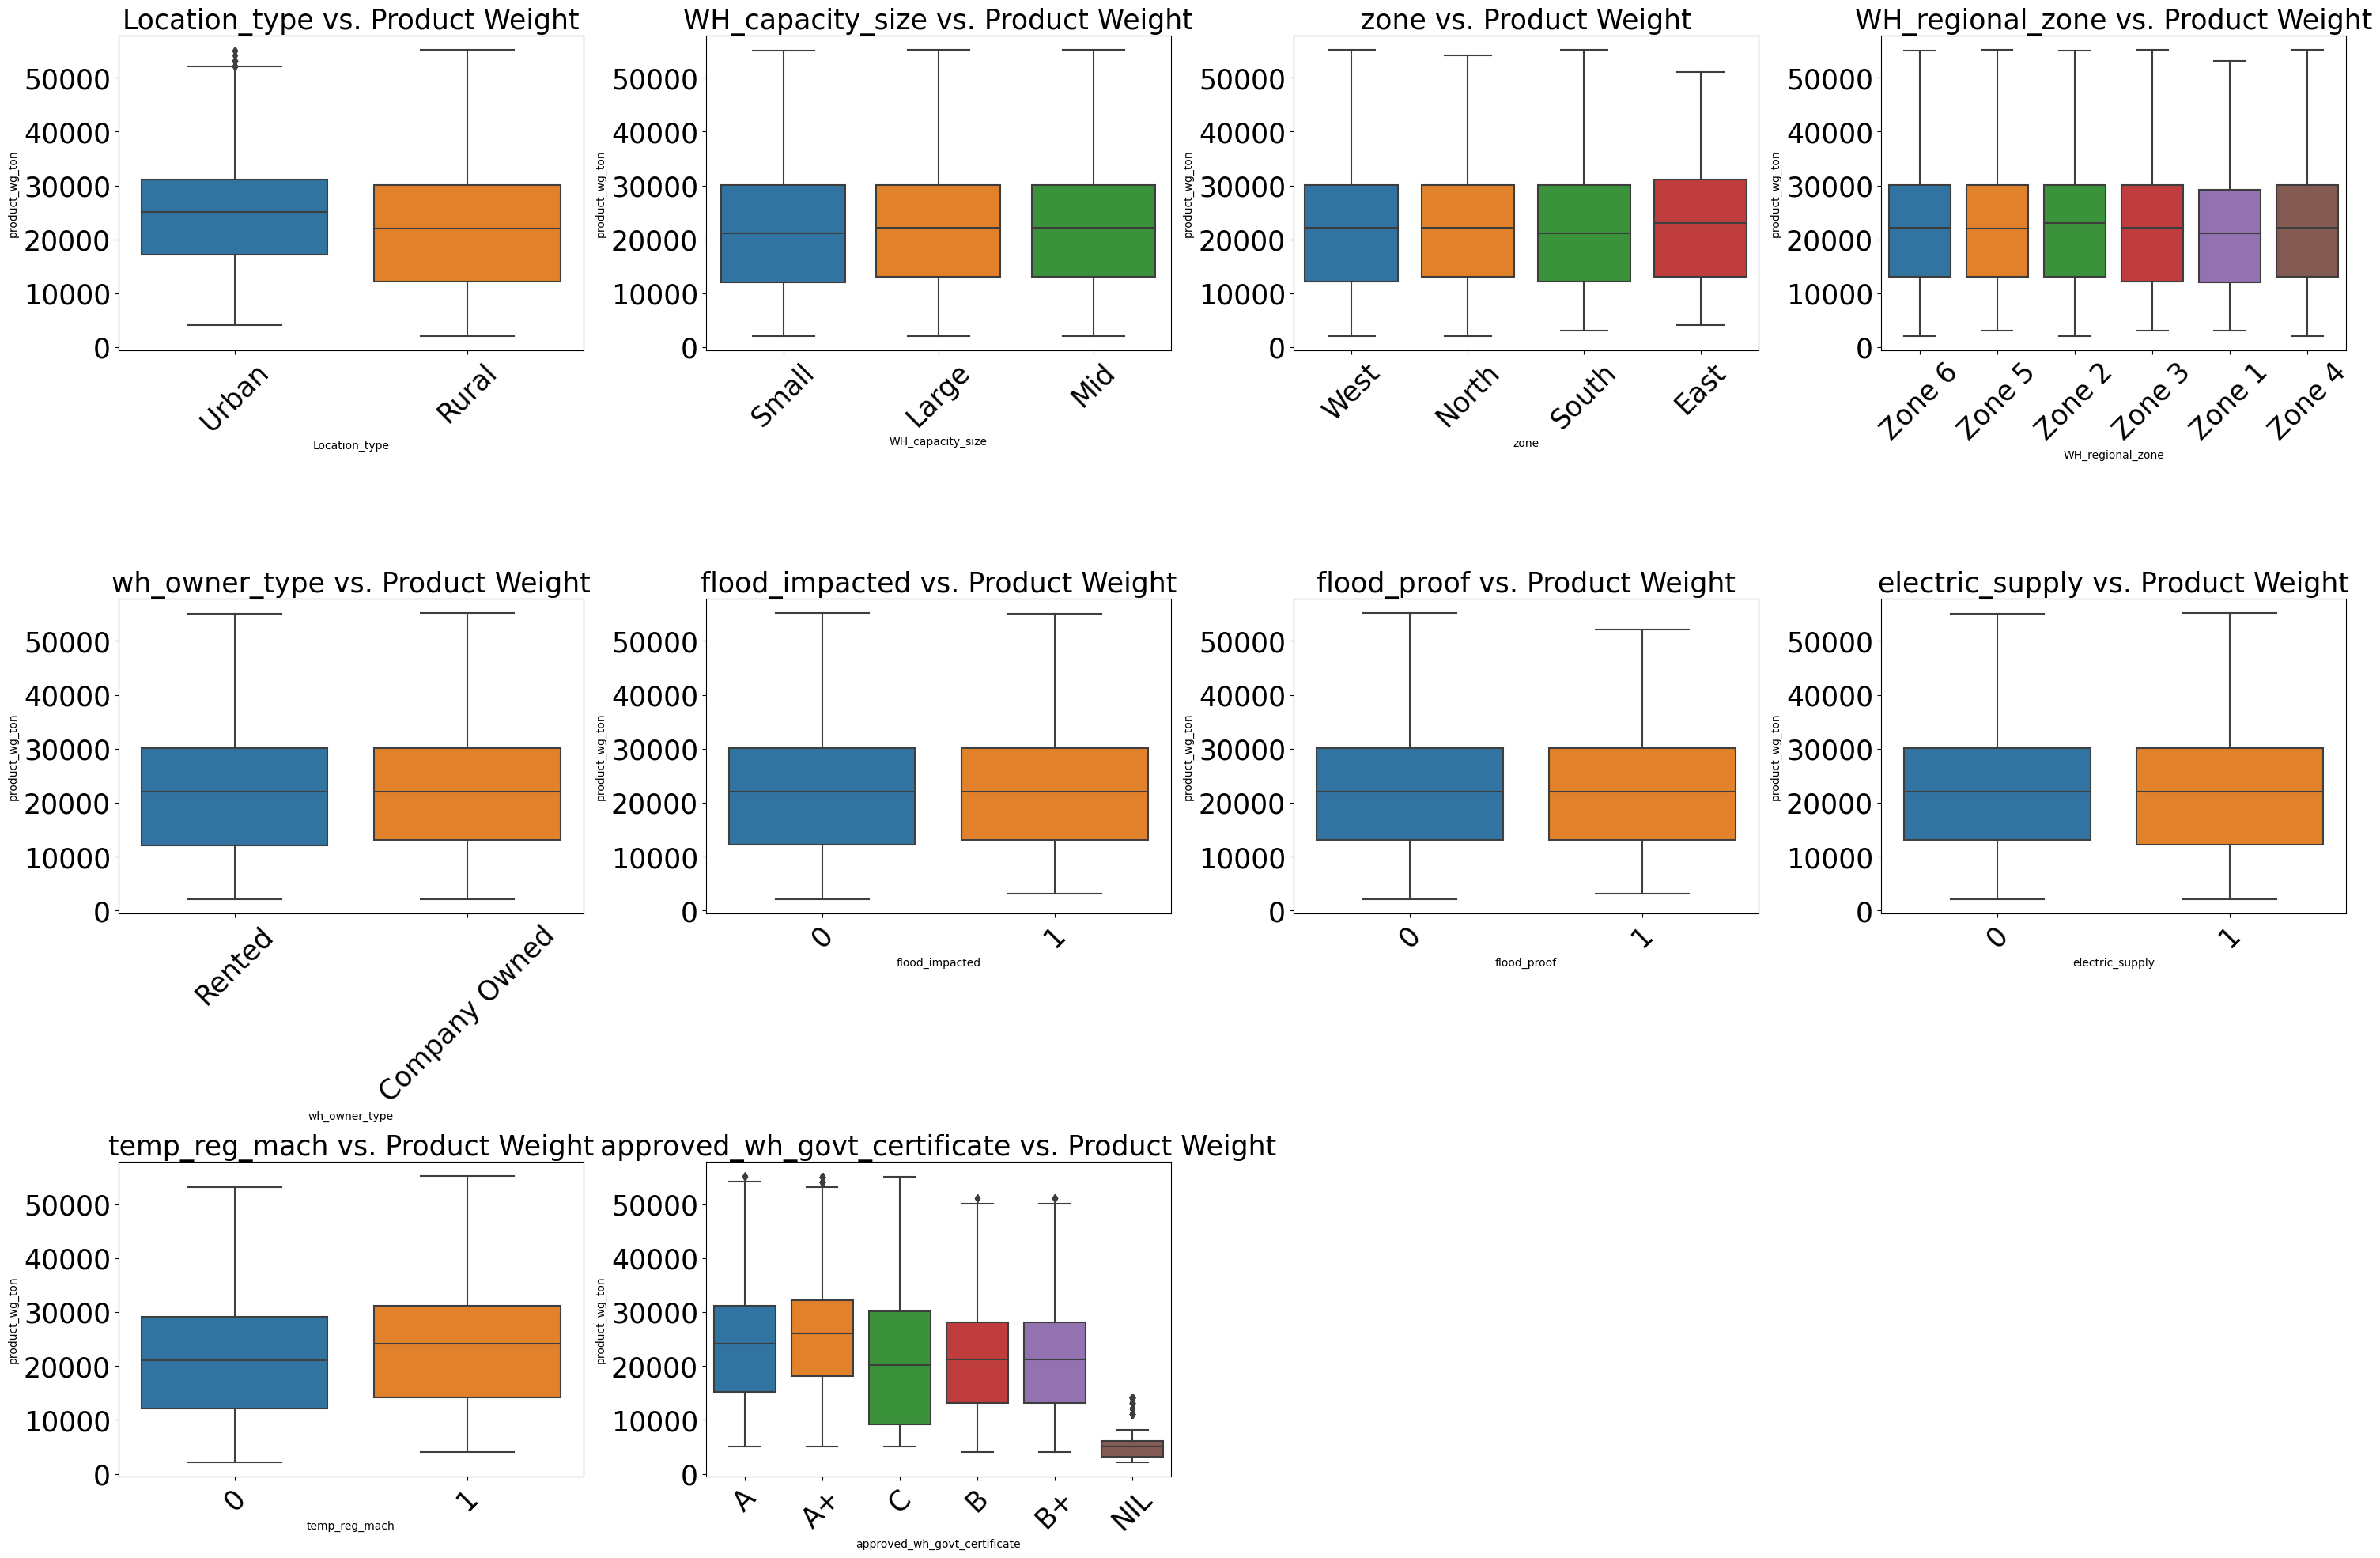

In [220]:
plt.figure(figsize=(30, 26))
for i, feature in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df_train, x=feature, y='product_wg_ton')
    plt.xticks(rotation=45, fontsize=25)  
    plt.yticks(fontsize=25)  
    plt.title(f'{feature} vs. Product Weight', fontsize=25)  

plt.tight_layout()
plt.show()

<div style="font-family: 'CustomFont'; font-size: 20px; ">
From above box plot, we can select the categorical features for training the model according to change in product weight with change in category.

## Encoding Categorical variables

### One Hot Encoding

In [221]:
# Encode categorical variables (One-Hot Encoding)
df_train = pd.get_dummies(df_train, columns=['Location_type', 'zone', 'WH_regional_zone', 'wh_owner_type', 
                                               'approved_wh_govt_certificate'])
df_test = pd.get_dummies(df_test, columns=['Location_type', 'zone', 'WH_regional_zone', 'wh_owner_type', 
                                               'approved_wh_govt_certificate'])

In [222]:
df_train

Ware_house_ID WH_Manager_ID WH_capacity_size  num_refill_req_l3m  \
0         WH_100000     EID_50000            Small                   3   
1         WH_100001     EID_50001            Large                   0   
2         WH_100002     EID_50002              Mid                   1   
3         WH_100003     EID_50003              Mid                   7   
4         WH_100004     EID_50004            Large                   3   
...             ...           ...              ...                 ...   
16615     WH_116615     EID_66615            Large                   3   
16616     WH_116616     EID_66616            Large                   2   
16617     WH_116617     EID_66617            Large                   5   
16618     WH_116618     EID_66618            Small                   3   
16619     WH_116619     EID_66619            Large                   4   

       transport_issue_l1y  Competitor_in_mkt  retail_shop_num  \
0                        1                  2             4651   
1                        0                  4             6217   
2                        0                  4             4306   
3                        4                  2             6000   
4                        1                  2             4740   
...                    ...                ...              ...   
16615                    1                  6             4779   
16616                    0                  2             5718   
16617                    0                  4             4514   
16618                    2                  3             5829   
16619                    0                  6             3751   

       distributor_num  flood_impacted  flood_proof  ...  \
0                   24               0            1  ...   
1                   47               0            0  ...   
2                   64               0            0  ...   
3                   50               0            0  ...   
4                   42               1            0  ...   
...                ...             ...          ...  ...   
16615               70               0            0  ...   
16616               26               0            0  ...   
16617               50               1            0  ...   
16618               59               1            0  ...   
16619               49               0            0  ...   

       WH_regional_zone_Zone 5  WH_regional_zone_Zone 6  \
0                        False                     True   
1                         True                    False   
2                        False                    False   
3                        False                    False   
4                         True                    False   
...                        ...                      ...   
16615                    False                     True   
16616                     True                    False   
16617                    False                     True   
16618                    False                     True   
16619                     True                    False   

       wh_owner_type_Company Owned  wh_owner_type_Rented  \
0                            False                  True   
1                             True                 False   
2                             True                 False   
3                            False                  True   
4                             True                 False   
...                            ...                   ...   
16615                        False                  True   
16616                         True                 False   
16617                         True                 False   
16618                        False                  True   
16619                        False                  True   

       approved_wh_govt_certificate_A  approved_wh_govt_certificate_A+  \
0                                True                            False   
1                        

In [223]:
df_test

Ware_house_ID WH_Manager_ID WH_capacity_size  num_refill_req_l3m  \
0        WH_116621     EID_66621            Large                   5   
1        WH_116622     EID_66622            Large                   5   
2        WH_116623     EID_66623            Small                   3   
3        WH_116624     EID_66624              Mid                   5   
4        WH_116625     EID_66625              Mid                   6   
...            ...           ...              ...                 ...   
5524     WH_122145     EID_72145            Large                   8   
5525     WH_122146     EID_72146            Small                   3   
5526     WH_122147     EID_72147            Large                   7   
5527     WH_122148     EID_72148            Large                   6   
5528     WH_122149     EID_72149              Mid                   7   

      transport_issue_l1y  Competitor_in_mkt  retail_shop_num  \
0                       0                  3             5590   
1                       0                  2             5856   
2                       0                  3             4803   
3                       2                  2             4784   
4                       0                  4             3699   
...                   ...                ...              ...   
5524                    1                  3             5030   
5525                    1                  3             4320   
5526                    2                  2             5268   
5527                    2                  4             4378   
5528                    2                  9             3626   

      distributor_num  flood_impacted  flood_proof  ...  \
0                  15               0            0  ...   
1                  40               0            0  ...   
2                  40               0            0  ...   
3                  15               0            0  ...   
4                  24               0            0  ...   
...               ...             ...          ...  ...   
5524               46               0            0  ...   
5525               60               0            0  ...   
5526               64               0            0  ...   
5527               32               0            0  ...   
5528               50               1            0  ...   

      WH_regional_zone_Zone 5  WH_regional_zone_Zone 6  \
0                        True                    False   
1                        True                    False   
2                       False                     True   
3                       False                    False   
4                       False                    False   
...                       ...                      ...   
5524                    False                     True   
5525                    False                     True   
5526                    False                     True   
5527                    False                     True   
5528                    False                    False   

      wh_owner_type_Company Owned  wh_owner_type_Rented  \
0                            True                 False   
1                            True                 False   
2                           False                  True   
3                           False                  True   
4                           False                  True   
...                           ...                   ...   
5524                        False                  True   
5525                        False                  True   
5526                         True                 False   
5527                        False                  True   
5528                         True                 False   

      approved_wh_govt_certificate_A  approved_wh_govt_certificate_A+  \
0                               True                            False   
1                              False                            False   
2            

## Model Selection and Training

<div style="font-family: 'CustomFont'; font-size: 20px; ">
Five machine learning algorithms were selected for training the model.
    


<div style="font-family: 'CustomFont'; font-size: 20px;line-height:1.5 ">


     
    1. Decision Tree Regressor
    2. Random Forest Regressor 
    3. Gradient Boosting Regressor 
    4. Ada Boost Regressor
    5. Support Vector Regressor
</div>

In [224]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score


In [225]:
# Define the features and target variable
features = ['transport_issue_l1y', 'Competitor_in_mkt', 'dist_from_hub', 'wh_est_year', 
            'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m']  

X_train = df_train[features]
Y_train = df_train['product_wg_ton']

X_test = df_test[features]
Y_test = df_test['product_wg_ton']


In [226]:
models = {
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Ada Boost Regressor": AdaBoostRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}


In [227]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, y_pred)
    mae = mean_absolute_error(Y_test, y_pred)
    r2 = r2_score(Y_test, y_pred)
    results[model_name] = {"MSE": mse, "MAE": mae, "R^2": r2}


In [228]:
# Display the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"MSE: {metrics['MSE']}")
    print(f"MAE: {metrics['MAE']}")
    print(f"R^2: {metrics['R^2']}")
    print("="*30)

Model: Decision Tree Regressor
MSE: 3652209.4563664314
MAE: 1390.7854042322301
R^2: 0.9730660428214506
Model: Random Forest Regressor
MSE: 2145477.9320362695
MAE: 1113.499113074783
R^2: 0.9841777391358931
Model: Gradient Boosting Regressor
MSE: 1895694.1045382316
MAE: 1053.5229090820744
R^2: 0.9860198204825692
Model: Ada Boost Regressor
MSE: 3035368.0329483612
MAE: 1394.2880644539025
R^2: 0.9776150646349002
Model: Support Vector Regressor
MSE: 135583140.25001726
MAE: 9612.95480980003
R^2: 0.0001147148717008939


<div style="font-family: 'CustomFont'; font-size: 20px; ">
By comparing  Mean Squared Error, Mean Absolute Error and R squared values of each model, Gradient Boosting Regressor Model is identified as best model.

### BEST MODEL

In [229]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor 
gradient_boosting_regressor = GradientBoostingRegressor(random_state=42)

# Train the model on the training dataset 
gradient_boosting_regressor.fit(X_train, Y_train)
Y_pred = gradient_boosting_regressor.predict(X_test)


### SAVE THE TRAINED MODEL

In [230]:
import joblib

# Save the trained model to a file
joblib.dump(gradient_boosting_regressor, 'gradient_boosting_model.pkl')


['gradient_boosting_model.pkl']

### FEATURE IMPORTANCE ANALYSIS

In [231]:
# Load the trained Gradient Boosting model
import joblib

loaded_model = joblib.load('gradient_boosting_model.pkl')

# Get feature importances from the loaded model
feature_importances = loaded_model.feature_importances_

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Get the feature names
feature_names = X_train.columns

for f in range(X_train.shape[1]):
    print( f + 1, indices[f], feature_importances[indices[f]])


1 4 0.9956670151557143
2 5 0.002410442421985672
3 0 0.0009542422323752802
4 3 0.0007827623663900616
5 6 0.00011847963668795868
6 2 3.7715757953942245e-05
7 1 2.9342428892877537e-05


In [232]:
for i in indices:
    print(i,feature_names[i])

4 storage_issue_reported_l3m
5 temp_reg_mach
0 transport_issue_l1y
3 wh_est_year
6 wh_breakdown_l3m
2 dist_from_hub
1 Competitor_in_mkt


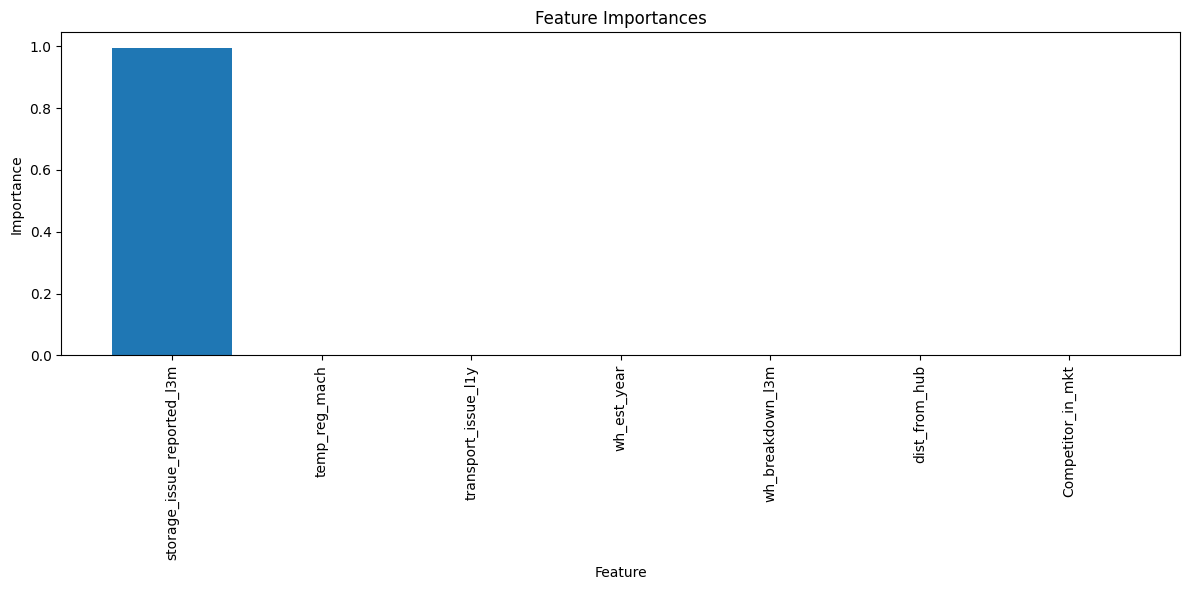

In [233]:
# Create a bar plot of feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

### ACTUAL VS PREDICTED PRODUCT WEIGHT

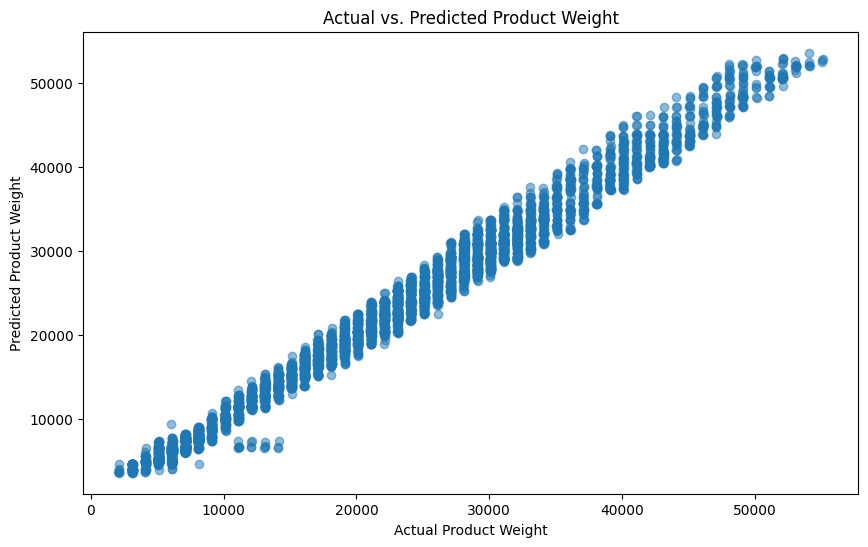

In [234]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel("Actual Product Weight")
plt.ylabel("Predicted Product Weight")
plt.title("Actual vs. Predicted Product Weight")
plt.show()


## CONCLUSION

<div style="font-family: 'CustomFont'; font-size: 20px; ">
In conclusion, this project successfully addressed the supply chain optimization challenge for the FMCG company. A Gradient Boosting Regressor model was developed to predict the optimum product weight for shipments. The project provided valuable insights into supply chain dynamics and identified areas for improvement. Implementing the recommended next steps can lead to further enhancements and cost savings for the company.

<div style="font-family: 'CustomFont'; font-size: 20px; ">
Here are some potential key findings that could be derived from the project:


1. **Supply Chain Optimization Impact:** 
    <br>The predictive model, specifically the Gradient Boosting Regressor, has demonstrated its effectiveness in optimizing product weight shipments. This optimization has the potential to significantly reduce inventory costs and improve overall profitability for the FMCG company.

2. **Feature Importance Analysis:**
    <br>Among the analyzed features, "storage_issue_reported_l3m" has been identified as the most influential factor affecting product weight shipments. This variable plays a crucial role in supply chain dynamics, and understanding and managing it can lead to better decision-making.

3. **Data Insights from EDA:**
    <br>Exploratory Data Analysis (EDA) has provided valuable insights into the relationships between various variables and product weight. These insights can inform supply chain strategies.

4. **Model Performance:** 
    <br>The Gradient Boost Regressor emerged as the best-performing model among the five machine learning algorithms tested. It achieved the lowest Mean Squared Error (MSE) and Mean Absolute Error (MAE) and the highest R-squared (R^2) score on the dataset, indicating its accuracy in predicting product weights.

5. **Actual vs. Predicted Product Weight:**
    <br>A scatter plot comparing actual product weights to predicted product weights using the Gradient Boosting Regressor model shows a strong positive linear relationship. This indicates that the model provides reliable predictions that align with the actual data.

7. **Recommendation for Model Deployment:** 
    <br>The Gradient Boosting Regressor model should be considered for deployment in the company's supply chain operations. Its accuracy and effectiveness in optimizing product weight shipments make it a valuable tool for decision support.

These key findings summarize the main insights and outcomes of the data science project. They highlight the importance of the predictive model, the significance of specific features, and the potential for improving supply chain efficiency and profitability.</div>